<a href="https://colab.research.google.com/github/makdatascience/Netflix-Movies-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV Shows Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution 1**    - Mohd Ashif Khan
##### **Contribution 2**    - Mayank Belwal
##### **Contribution 3**    - Shubhangini Ganguli


# **Project Summary -**

1.The goal of the project was to analyze and cluster Netflix movies and TV shows based on their genre, director,cast,country and description, and to develop a recommender system that recommends movies and TV shows based on user preferences.

2.The project used a dataset of Netflix movies and TV shows.The dataset contained information such as the title, director, cast, country, date added, release year, rating, and genre of each movie and TV show.

3.The project first performed data cleaning and preprocessing on the dataset. This included handling missing values, converting data types, and creating new features..

4.The project then used unsupervised machine learning techniques such as k-means clustering and hierarchical clustering to cluster the movies and TV shows based on their genre,director,cast,country and description.

5.The project also developed a content-based recommender system that recommends movies and TV shows based on their similarity to other movies and TV shows.

6.The content-based recommender system used features such as genre, director, cast to compute the similarity between movies and TV shows. The similarity was measured using cosine similarity, which measures the cosine of the angle between two vectors in a high-dimensional space.

7.Finally the project demonstrated the usefulness of unsupervised machine learning techniques for analyzing and clustering large datasets of movies and TV shows, as well as the effectiveness of content-based recommender systems for providing personalized recommendations based on user preferences.

# **GitHub Link -**

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do:

1.Exploratory Data Analysis

2.Understanding what type content is available in different countries

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.

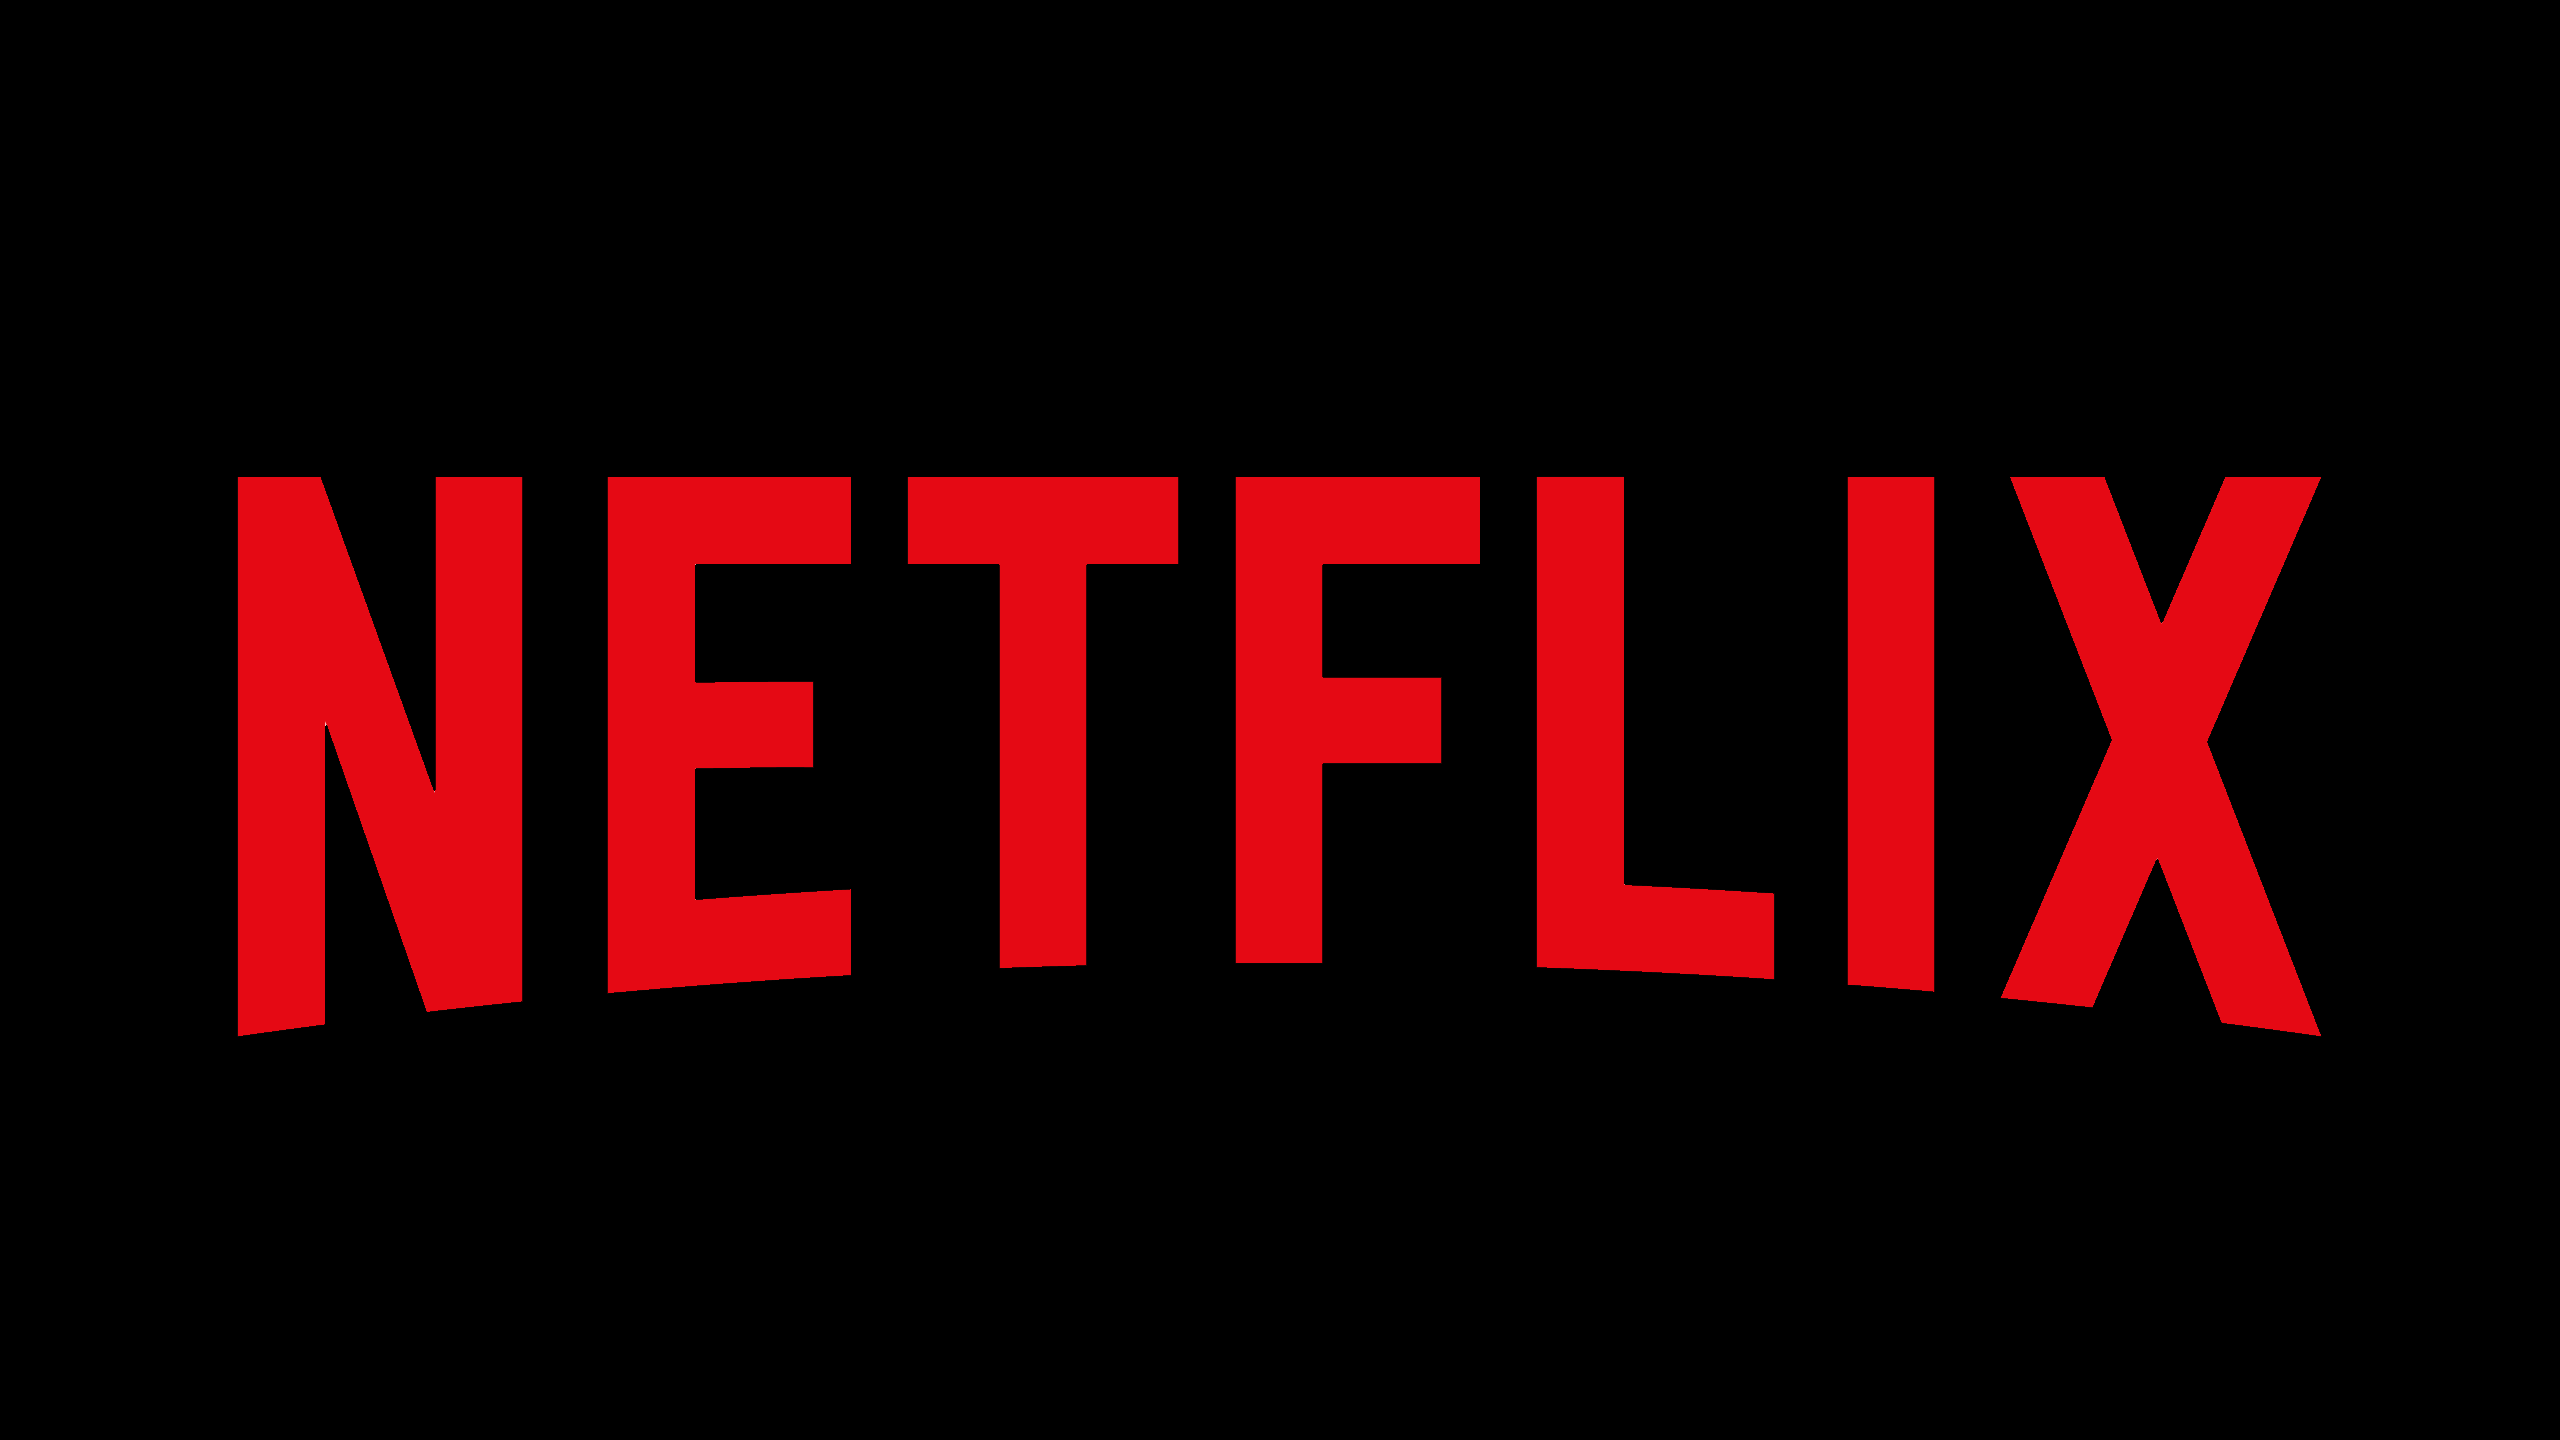

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import missingno as msno

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [6]:
# Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone projects/Capstone Project_4_Unsupervised_ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [7]:
recommender_df = df.copy()

In [8]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(f'Number of rows in datasets are {df.shape[0]}')
print(f'Number of columns in datasets are {df.shape[1]}')

Number of rows in datasets are 7787
Number of columns in datasets are 12


### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print(f'Duplicates entries in datasets are {df.duplicated().sum()}')

Duplicates entries in datasets are 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

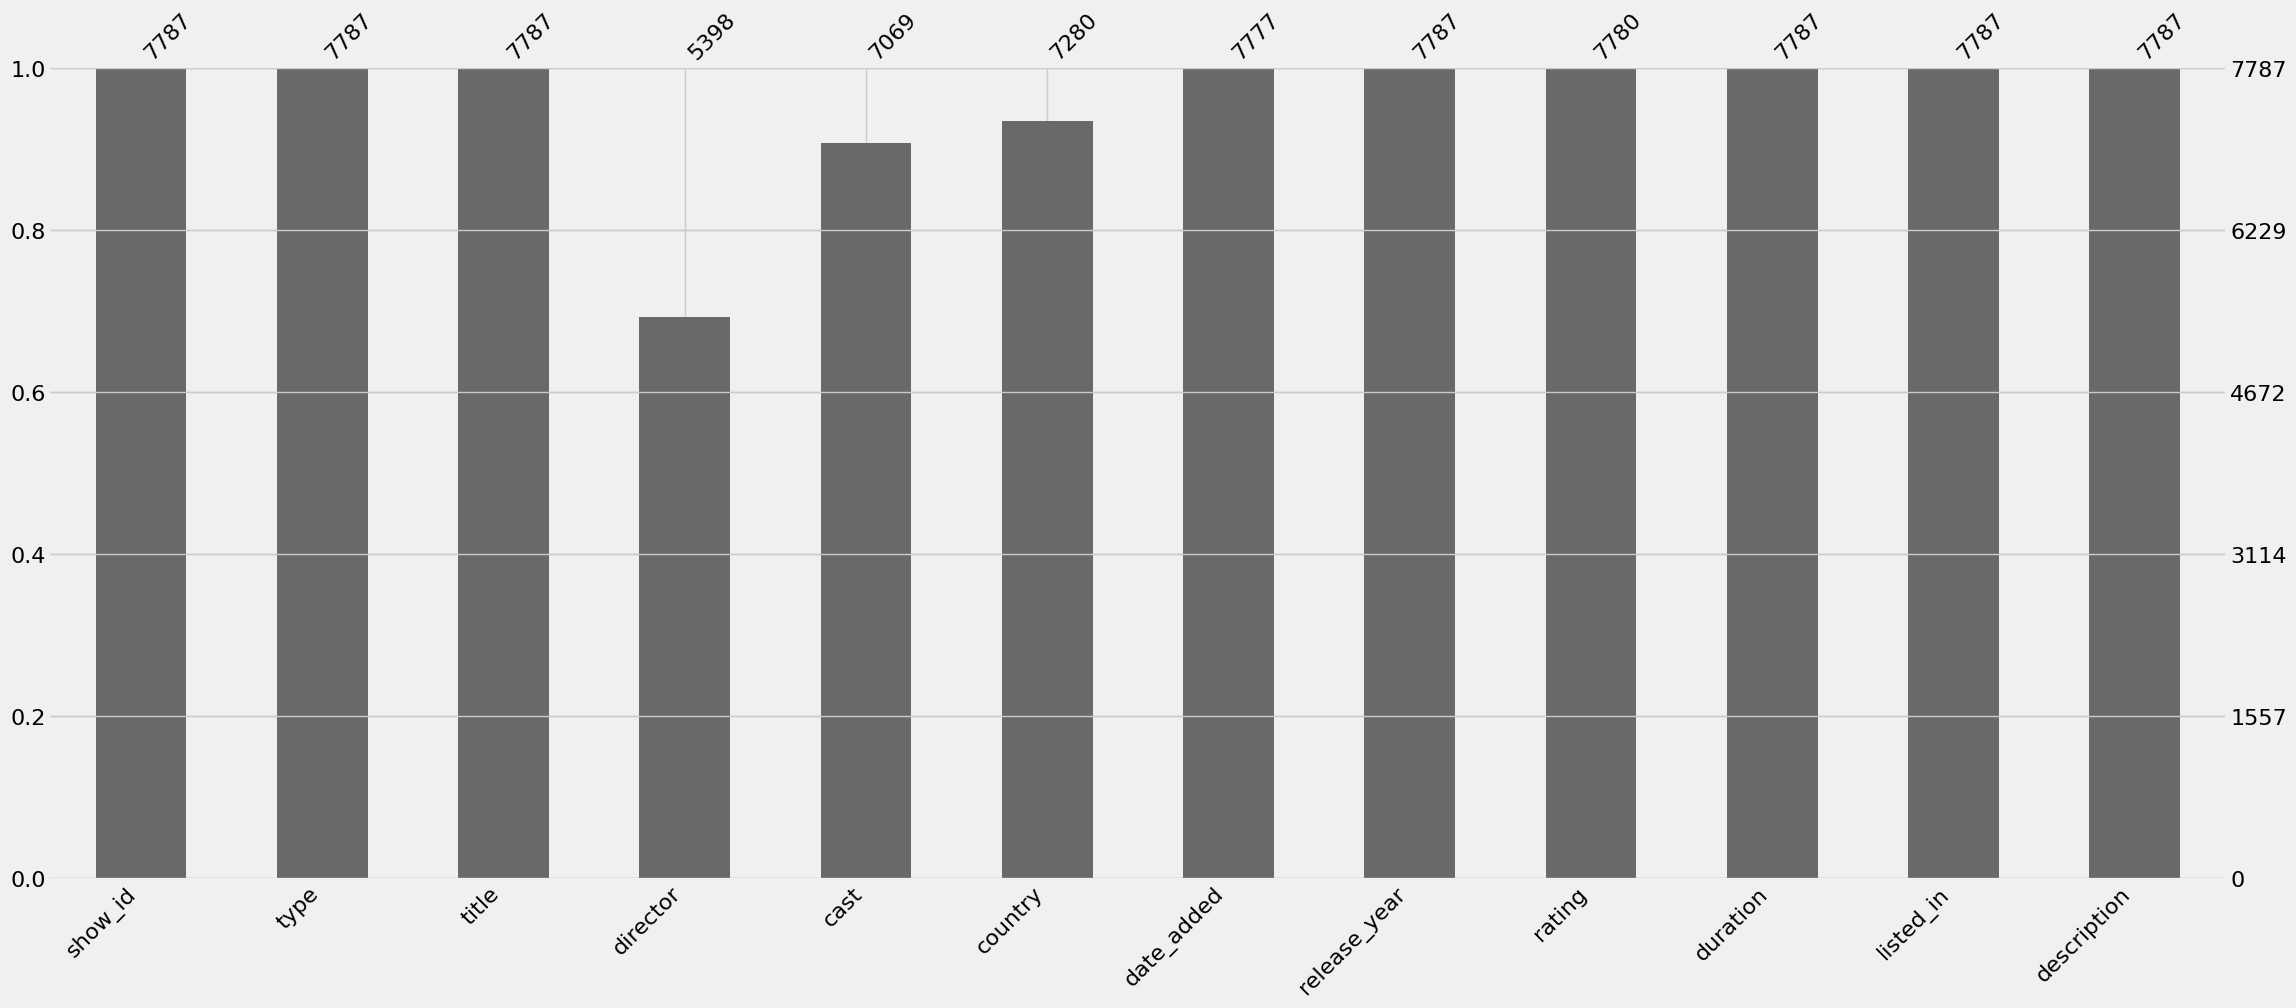

In [13]:
# Visualizing the missing values
msno.bar(df)
plt.show()

### What did you know about your dataset?

* There are 7787 rows and 12 columns present in dataset.

* Datatypes of variables present in datasets are object as well as integer.

* There is no duplicate entries in the dataset.

* There are missing values present in the column director,cast,country and rating

#### Missing Values Imputation

In [14]:
# Replacing missing values in the director, cast, and country column with 'Unknown'
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

# Replacing the missing values present in rating column with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the missing value present in date_added column
df.dropna(axis=0, inplace = True)

In [15]:
clean_df = df[df != 'Unknown'].dropna()

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# Dataset Describe
df.describe()

,release_year
count,7777.000000
mean,2013.935965
std,8.760694
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

* show_id : Unique ID for every Movie / Tv Show
* type : Identifier - A Movie or TV Show
* title : Title of the Movie / Tv Show
* director : Director of the Movie
* cast : Actors involved in the movie / show
* country : Country where the movie / show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Releaseyear of the movie / show
* rating : TV Rating of the movie / show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description: The Summary description

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for elem in df.columns:
  if df[elem].nunique() < 50 :
    print("-"*100)
    print(" ")
    print(f'Unique values present in {elem} are')
    print(" ")
    print(df[elem].unique())
    print(" ")
    print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in type are
 
['TV Show' 'Movie']
 
****************************************************************************************************
----------------------------------------------------------------------------------------------------
 
Unique values present in rating are
 
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']
 
****************************************************************************************************


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.

In [20]:
# Dropping the column show_id
df.drop(columns = ['show_id'],inplace = True)

In [21]:
# Looking datatypes of the feature available in dataset
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [22]:
df[df['type'] == 'TV Show']['duration'].unique()

# for tv shows duration is in seasons and for movies duration is in minutes

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [23]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x : int(x.split(" ")[0]))

In [24]:
# Creating feature month name from date_added columns
df['month_added'] = df['date_added'].apply(lambda x : x.split(" ")[0])

In [25]:
# Creating feature year from date_added columns
df['year_added'] = df['date_added'].apply(lambda x : x.split(" ")[-1])

In [26]:
# Dropping the column date_added
df.drop(columns = ['date_added'],inplace = True)

In [27]:
# Applying value counts on country
df['country'].value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [28]:
# Choosing the main country
df['country'] = df['country'].apply(lambda x : x.split(",")[0])

In [29]:
# Choosing the main genres
df['genres'] = df['listed_in'].apply(lambda x : x.split(",")[0])

In [30]:
# Applying value_counts on 'rating'.
df['rating'].value_counts().to_frame()

,rating
TV-MA,2868
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194
NR,83


* TV-MA: This rating indicates that the content is intended for mature audiences only and may contain adult themes, language, nudity, violence, and other mature content.

* R: This rating indicates that the content is restricted and may contain adult themes, language, nudity, violence, and other mature content.

* PG-13: This rating indicates that the content may contain material that parents may find inappropriate for children under 13 years of age.

* TV-14: This rating indicates that the content may contain material that is inappropriate for children under 14 years of age.

* TV-PG: This rating indicates that the content is intended for a general audience but may contain some material that parents may find inappropriate for younger children.

* NR: This rating stands for "Not Rated" and indicates that the content has not been officially rated by a classification board.

* TV-G: This rating indicates that the content is suitable for a general audience and contains little or no violence, sexual content, or mature themes.

* TV-Y: This rating indicates that the content is intended for children under 7 years of age.

* TV-Y7: This rating indicates that the content is intended for children 7 years and older.

* PG: This rating indicates that the content may contain material that parents may find inappropriate for younger children.

* G: This rating indicates that the content is suitable for all ages and contains little or no violence, sexual content, or mature themes.

* NC-17: This rating indicates that the content is intended for adults only and may contain adult themes, language, nudity, violence, and other mature content.

* TV-Y7-FV: This rating indicates that the content is intended for children 7 years and older and may contain fantasy violence.

* UR: This rating stands for "Unrated" and indicates that the content has not been officially rated by a classification board.

In [31]:
# On the basis of description of rating ,assinging rating according to age_groups
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['target_ages'] = df['rating'].replace(ratings_ages)    

In [32]:
# Now checking unique values present in target_ages
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [33]:
# Separating dataframe on the basis of type of show
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

### What all manipulations have you done and insights you found?

Following Data Manipulations are done:

* Dropped the column show_id
* Splitted the duration column in order to remove units present inside the category of duration column.
* Created feature month name from date_added columns.
* Created feature year from date_added columns.
* Selected the principle country from the available country list.
* Selected the main genres from the listed genres.
* On the basis of description of rating,assingned rating according to age_groups.
* Created movies_df and tv_df on the basis of type of show

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**UNIVARIATE ANALYSIS** 

#### Chart - 1

####Content Type on Netflix

In [34]:
def pie_chart(data, feature):
  fig = go.Figure()

  # Adding a pie chart to the figure
  fig.add_trace(go.Pie(labels=data[feature].value_counts().index,
                       values=data[feature].value_counts().values,
                       hole=0.3,
                       marker=dict(colors=['#ff9999','#66b3ff'])))

  # Updating the layout
  fig.update_layout(title='Netflix Content Distribution (Pie Chart)',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))

  # Showing the plot
  fig.show()


In [35]:
# Plotting pie chart
# Calling the function
pie_chart(df,'type')

##### 1. Why did you pick the specific chart?

I have used pie chart beacause Pie charts are an effective visualization technique when the categories present inside a feature are limited in number. They allow us to represent the percentage distribution of each category in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

Around 69% content available on Netflix are Movie and 31% are TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to develop personalized recommendations for users based on their viewing habits and preferences. If a user tends to watch mostly movies, the recommendation algorithm can suggest similar movies to watch, which can increase user engagement and satisfaction.

#### Chart - 2

**MOVIE RATING ANALYSIS**

In [36]:
# Creating a function to fetch required dataframe
# def create_temp_df(data,feature):
#   temp_df = data.groupby(feature).size().reset_index().rename(columns = {0:'counts'}).sort_values(by = ['counts'],ascending = False)
#   return temp_df

In [37]:
def create_temp_df(data, feature):
    """
    This function creates a temporary dataframe by grouping the 'data' dataframe by a specified 'feature'.
    It calculates the size of each group, renames the count column to 'counts', sorts the dataframe in descending order based on 'counts',
    and returns the resulting temporary dataframe.

    Parameters:
    data (pandas.DataFrame): The input dataframe.
    feature (str): The name of the feature to group the dataframe by.

    Returns:
    temp_df (pandas.DataFrame): The resulting temporary dataframe.
    """

    # Grouping the 'data' dataframe by the specified 'feature' and calculating the size of each group
    temp_df = data.groupby(feature).size().reset_index()

    # Renaming the count column to 'counts'
    temp_df = temp_df.rename(columns={0: 'counts'})

    # Sorting the dataframe in descending order based on 'counts'
    temp_df = temp_df.sort_values(by='counts', ascending=False)

    # Returning the resulting temporary dataframe
    return temp_df


In [38]:
# Creating a function to plot bar plot
def plot_bar_chart(data, x, y, title, counts):
    """
    This function takes in a dataframe, x and y variables to be plotted, and additional parameters to create a bar chart.
    It uses Plotly Express to create a bar chart with color-coding based on the 'counts' variable.
    The function also adds axis labels, font, and formatting options to the plot and displays it using the show() function.

    Parameters:
    data (pandas.DataFrame): The input dataframe.
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    title (str): The title of the plot.
    counts (str): The name of the column used for color-coding the plot.
    
    """
    
    # Creating a bar chart using Plotly Express
    fig = px.bar(data , x = x , y = y,
             title = title,
             color='counts',
             color_continuous_scale='teal',
             labels=dict(counts=counts))
    
    # Adding formatting options to the plot
    fig.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
                  font=dict(size=15, color='black', family='Arial, sans-serif'),
                  title=dict(x=0.5, font=dict(size=20)),
                  xaxis=dict(title=dict(font=dict(size=15))),
                  bargap=0.1,
                  bargroupgap=0.5)
    
    # Add hover text to the plot and customize the marker colors and line widths
    fig.update_traces(texttemplate='%{y}',
                  textposition='outside',
                  hoverinfo='x+y',
                  marker=dict(color='#FF0092', line=dict(color='black', width=1.5))) 
    
    # Display the resulting plot
    fig.show()


  

In [39]:
# Calling the function to crate required dataframe
rating_df = create_temp_df(df,'rating')
rating_df

,rating,counts
8,TV-MA,2868
6,TV-14,1928
9,TV-PG,804
5,R,665
4,PG-13,386
10,TV-Y,279
11,TV-Y7,270
3,PG,247
7,TV-G,194
2,NR,83


In [40]:
# Calling the function for the visualization
plot_bar_chart(data = rating_df,x = 'rating',y = 'counts',title = 'Countplot of rating of Movies & TV Shows',counts = 'counts of rating')

##### 1. Why did you pick the specific chart?

I have used bar chart it is more visually appealing for the variable that i have choosen.

##### 2. What is/are the insight(s) found from the chart?

Netflix Contains more Movies and Shows that have rating "TV-MA" followed by "TV-14"

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On the positive side, having a high number of movies and shows with mature ratings can appeal to a certain demographic of viewers who prefer this type of content, potentially leading to increased viewership and subscriber growth.

On the negative side, the mature content might not be suitable for all ages, and some viewers may not be comfortable watching it. This could result in a decrease in the number of subscribers, especially if these viewers cancel their subscription or choose not to subscribe in the first place.

#### Chart - 3

**Content Added Over the Years**

In [41]:
# create_temp_df function calling
show_df = create_temp_df(df,'year_added')
show_df

,year_added,counts
11,2019,2153
12,2020,2009
10,2018,1685
9,2017,1225
8,2016,443
13,2021,117
7,2015,88
6,2014,25
3,2011,13
5,2013,11


In [42]:
# Calling the function for the visualization
plot_bar_chart(data = show_df,x = 'year_added',y = 'counts',title = 'Year wise shows distributions',counts = 'counts of shows')

##### 2. What is/are the insight(s) found from the chart?

from 2010 to 2019 netflix has shown tremendous increase in number of shows i.e 1 show in 2010 to 2153 show in 2019.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The tremendous increase in the number of shows offered by Netflix from 2010 to 2019 is a positive indicator for the company's business impact. This increase in content has helped Netflix attract more subscribers and retain existing ones, as users have more choices of shows and movies to watch. The growth in content also allowed Netflix to expand into new markets and cater to a wider range of audience preferences.

#### Chart - 4

ANALYSIS OF SHOWS RELEASE YEAR

In [43]:
# Calling the function create_temp_df
release_df = create_temp_df(df,'release_year').iloc[:20,:]
release_df

,release_year,counts
69,2018,1120
68,2017,1012
70,2019,996
67,2016,881
71,2020,868
66,2015,539
65,2014,334
64,2013,266
63,2012,218
61,2010,172


In [44]:
# Calling the function for the visualization
plot_bar_chart(data = release_df,x = 'release_year',y = 'counts',title = 'Analysis of shows Releases',counts = 'counts of released shows')

##### 2. What is/are the insight(s) found from the chart?

From 2001 to 2018, the number of shows released by Netflix increased every year. However, in 2019 and 2020, there was a slight decline, which is likely due to the impact of COVID-19. As we know, there were lockdowns across the globe during that time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Trend suggests that Netflix has been successful in consistently increasing the number of shows it produces and releases, which has likely contributed to its success in the streaming market. However, the decline in the number of shows in 2019 and 2020 is likely due to the impact of COVID-19, which caused production delays and disruptions in the entertainment industry.

#### Chart - 5

ANALYSIS OF MONTHLY ADDITION OF SHOWS 

In [45]:
# Calling the function
month_added_df = create_temp_df(df,'month_added')
# Dropping the rows present at index 0 because it is an empty rows having no values of month
month_added_df = month_added_df.drop(0)
month_added_df

,month_added,counts
3,December,817
11,October,780
5,January,746
10,November,730
8,March,661
12,September,614
2,August,612
1,April,596
6,July,592
7,June,538


In [46]:
# Calling the function for the visualization
plot_bar_chart(data = month_added_df,x = 'month_added',y = 'counts',title = 'Analysis of Monthly Addition of Shows',counts = 'counts of added shows')


##### 2. What is/are the insight(s) found from the chart?

The top three months in a calendar year during which the most number of shows are added to the platform are December, followed by October, and then January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

knowing which months are most popular for adding new content can help Netflix plan its content release schedule, allowing the company to maximize the impact of its programming and attract and retain more subscribers. This information could also help the company target its marketing efforts more effectively, focusing on promoting its new releases during the months when viewers are most likely to be seeking out fresh content.

#### Chart - 6

TOP 10 CONTENT CREATING COUNTRIES

In [47]:
# Calling the function
country_df = create_temp_df(df,'country')
# Dropping country having unknownn lablel
country_df = country_df[country_df['country'] != 'Unknown'].iloc[:10,:]
country_df

,country,counts
75,United States,2877
28,India,956
74,United Kingdom,576
9,Canada,259
35,Japan,236
19,France,196
64,South Korea,194
66,Spain,168
42,Mexico,123
1,Australia,107


In [48]:
# Calling the function for the visualization
plot_bar_chart(data = country_df,x = 'country',y = 'counts',title = 'Top 10 Content Creating Countries',counts = 'Content Created')


##### 2. What is/are the insight(s) found from the chart?

Majority of content available on the popular streaming platform Netflix is produced in the United States, followed by content produced in India and the United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the availability of content on Netflix can help create positive business impact by informing decisions about which titles to acquire and produce. However, failure to invest in non-American content or producing content that is not well received can lead to negative growth.

#### Chart - 7

TARGET AUDIENCE OF CONTENT

In [49]:
# Calling the function
targeted_audience_df = create_temp_df(df,'target_ages')
targeted_audience_df

,target_ages,counts
0,Adults,3624
3,Teens,2314
2,Older Kids,1327
1,Kids,512


In [50]:
# Calling the function for the visualization
plot_bar_chart(data = targeted_audience_df,x = 'target_ages',y = 'counts',title = '',counts = 'Content Created')

##### 2. What is/are the insight(s) found from the chart?

It can be observed that the majority of content available on Netflix is suitable for adult audiences, followed by teenagers, older kids, and kids. This means that viewers have access to a wide range of shows and movies that are targeted towards mature audiences, such as dramas and crime thrillers, as well as content that is suitable for younger viewers, such as cartoons and family-friendly movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the suitability of content for different age groups can create a positive business impact for Netflix by tailoring its offerings to better meet viewers' needs. However, failure to invest in certain age groups or producing content that is not well received can lead to negative growth.

#### Chart - 8

In [51]:
# Callling the function so that we can get genres_df
genres_df = create_temp_df(df,'genres')
# Getting top 20 genres 
genres_df_20 = genres_df.iloc[:20,:]
genres_df_20

,genres,counts
12,Dramas,1384
7,Comedies,1074
10,Documentaries,751
0,Action & Adventure,721
16,International TV Shows,689
4,Children & Family Movies,502
8,Crime TV Shows,369
17,Kids' TV,357
27,Stand-Up Comedy,321
13,Horror Movies,244


In [52]:
# Chart - 8 visualization code
plot_bar_chart(data = genres_df_20,x = 'genres',y = 'counts',title = 'Top 20 Genres',counts = 'Genres Counts')

##### 2. What is/are the insight(s) found from the chart?

Drama is the most popular genre of content available on Netflix, followed by comedies and documentaries. Action and adventure are also popular genres, with many of the platform's most-watched shows and movies falling under this category.Suprisingly,among all the genres thrillers content are less in number.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the popularity of different genres on Netflix can create a positive business impact by informing decisions about which titles to acquire and produce. However, failure to invest in less popular genres or producing content that is not well received can lead to negative growth.

#### Chart - 9

TV shows with Most Number of Seasons

In [53]:
# Choosing title and duration of top 20 tv shows which has most number of seasons
top_20_seasons = tv_df[['title','duration']].sort_values(by = 'duration',ascending = False).iloc[:20,:]
top_20_seasons

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2678,Heartland,11
1300,Cheers,11
1597,Danger Mouse: Classic Collection,10
5538,Shameless (U.S.),10


In [54]:
# Create the bar chart
fig = px.bar(top_20_seasons, x='title', y='duration')
fig.update_layout(
    title='Number of seasons of Tv Shows',
    xaxis_title='Title',
    yaxis_title='Duratio ( Number of Seasons )'
)

# Display the chart
fig.show()

##### 2. What is/are the insight(s) found from the chart?

Grey's Anatomy has most number of seasons i.e 16 seasons while Supernatural & NCIS have equal number of seasons i.e 15 seasons

#### Chart - 10

**Distribution of Movie Duration**

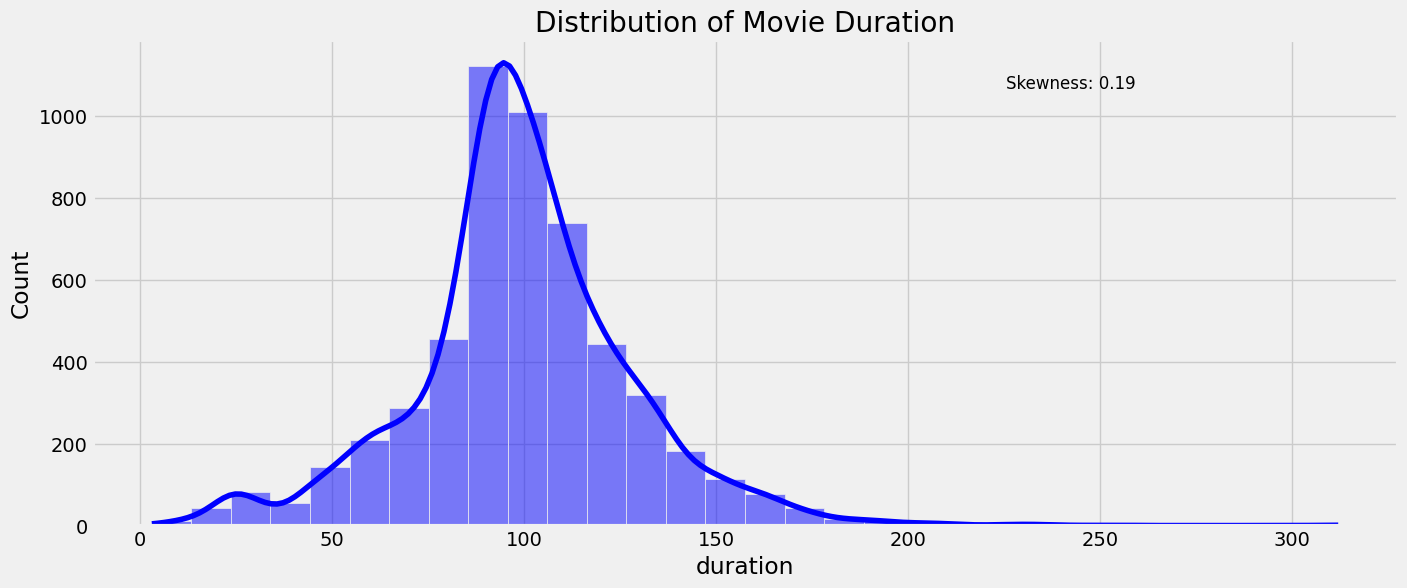

In [55]:
# Chart - 8 visualization code
plt.figure(figsize = (15,6))
sns.histplot(data = movies_df,x = 'duration',kde = True,color = 'blue',bins = 30)

# add the skewness value to the plot
skewness = movies_df['duration'].skew()
plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.title('Distribution of Movie Duration')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Based on the skewness value of 0.19, the histogram of duration for movies is approximately symmetric or slightly skewed to the right. This means that the distribution of movie durations is relatively balanced, with a slight tendency towards longer movies.

One possible insight from this chart is that there is a good mix of short and long movies available on Netflix. This could indicate that viewers have a range of options to choose from, including shorter movies for those with limited time and longer movies for those looking for a more immersive experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about the distribution of movie durations on Netflix can potentially help in creating a positive business impact for the company. By understanding the balance of movie durations, Netflix can make informed decisions about which titles to acquire and produce, leading to increased viewership and revenue.

One possible insight that could lead to negative growth is if the majority of viewers have a strong preference for movies of a specific duration. If Netflix fails to provide a sufficient number of movies that meet viewer preferences, it could result in a decrease in subscribers or a decrease in engagement with the platform.

Another possible insight that could lead to negative growth is if the duration of a movie has a strong correlation with viewer ratings. For example, if viewers consistently rate shorter movies more positively than longer movies, then Netflix may need to adjust its content strategy to focus on producing more shorter movies.

#### Chart - 11

**TOP 10 Director of Movies**

In [56]:
movies_director_df = movies_df[movies_df['director'] != 'Unknown']

# Calling the function "create_temp_df" so that we can get top directors
top_10_movie_direct_df = create_temp_df(movies_director_df,'director').iloc[:10,:]

top_10_movie_direct_df

,director,counts
2962,"Raúl Campos, Jan Suter",18
2235,Marcus Raboy,15
1546,Jay Karas,14
605,Cathy Garcia-Molina,13
3867,Youssef Chahine,12
2300,Martin Scorsese,12
1543,Jay Chapman,12
3472,Steven Spielberg,10
847,David Dhawan,9
3328,Shannon Hartman,8


In [57]:
# Calling the function "plot_bar_chart" for visualization purpose
plot_bar_chart(data = top_10_movie_direct_df,x = 'director',y = 'counts',title = 'Top 10 Movies Director',counts = 'Number of Movies Directed')

##### 2. What is/are the insight(s) found from the chart?

While data for the names of most directors is not available, from the available data, we can determine the top three directors of movies content on Netflix. According to the available data, the top three directors are Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas.

It is worth noting that the available data may not be a representative sample of all the content available on Netflix, and there may be other directors with a significant number of titles on the platform. Nonetheless, the available data suggests that these three directors have been responsible for a substantial amount of content on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas are the top three directors of overall content on Netflix could potentially have a positive business impact. By understanding which directors are most successful on the platform, Netflix can make more informed decisions about which directors to collaborate with and which titles to produce or acquire. This could lead to more successful titles, higher viewership, and increased revenue.

#### Chart - 12

**Top 10 TV Shows Director**

In [58]:
tv_shows_director_df = tv_df[tv_df['director'] != 'Unknown']

# Calling the function "create_temp_df" so that we can get top directors
top_10_tv_show_direct_df = create_temp_df(tv_shows_director_df,'director').iloc[:10,:]

top_10_tv_show_direct_df

,director,counts
3,Alastair Fothergill,3
141,Rob Seidenglanz,2
85,Ken Burns,2
147,Shin Won-ho,2
61,Iginio Straffi,2
152,Stan Lathan,2
127,"Pantham Thongsang, Cheewatan Pusitsuksa",1
126,Pali Yahya,1
114,Miguel Conde,1
115,Neslihan Yesilyurt,1


In [59]:
# Calling the function "plot_bar_chart" for visualization purpose
plot_bar_chart(data = top_10_tv_show_direct_df,x = 'director',y = 'counts',title = 'Top 10 TV Shows Director',counts = 'Number of TV Shows Directed')

##### 2. What is/are the insight(s) found from the chart?

While the names of most TV show directors are not available, the available data suggests that Alastair Fothergill is the top director of TV shows on Netflix.

#### Chart - 13

**BIVARIATE ANALYSIS**

**CONTENT CATEGORY OF POPULAR DIRECTOR**

In [60]:
# Creating a function so that we can do bivariate analysis with other feature present in dataset
def create_plot(hue_param,title):
  """
  The function create_plot is designed to create a bar chart visualization of the top 20 directors on Netflix,
  and how their content is distributed across a particular feature in the dataset that is specified using the hue_param parameter.

  """
  # Creating a dataframe that will contain director of both movies as well as TV Shows  
  director_df = df[df['director'] != 'Unknown']
  # Calling the function "create_temp_df" so that we can get top 20 directors
  top_20_director = create_temp_df(director_df,'director').iloc[:20,:]
  # Merging top_20_director with "df" and fetching the column required for analysis
  top_20_director = pd.merge(top_20_director,df,on = 'director')[['director','counts',hue_param]].drop_duplicates(subset =['director'],
                                                                                                            keep = 'first',ignore_index = True)
  # Chart - 13 visualization code
  sns.catplot(data = top_20_director,x = 'director',y = 'counts',kind = 'bar',hue = hue_param,aspect = 3,height = 6)
  plt.title(title)
  plt.xticks(rotation = 90)
  plt.show()

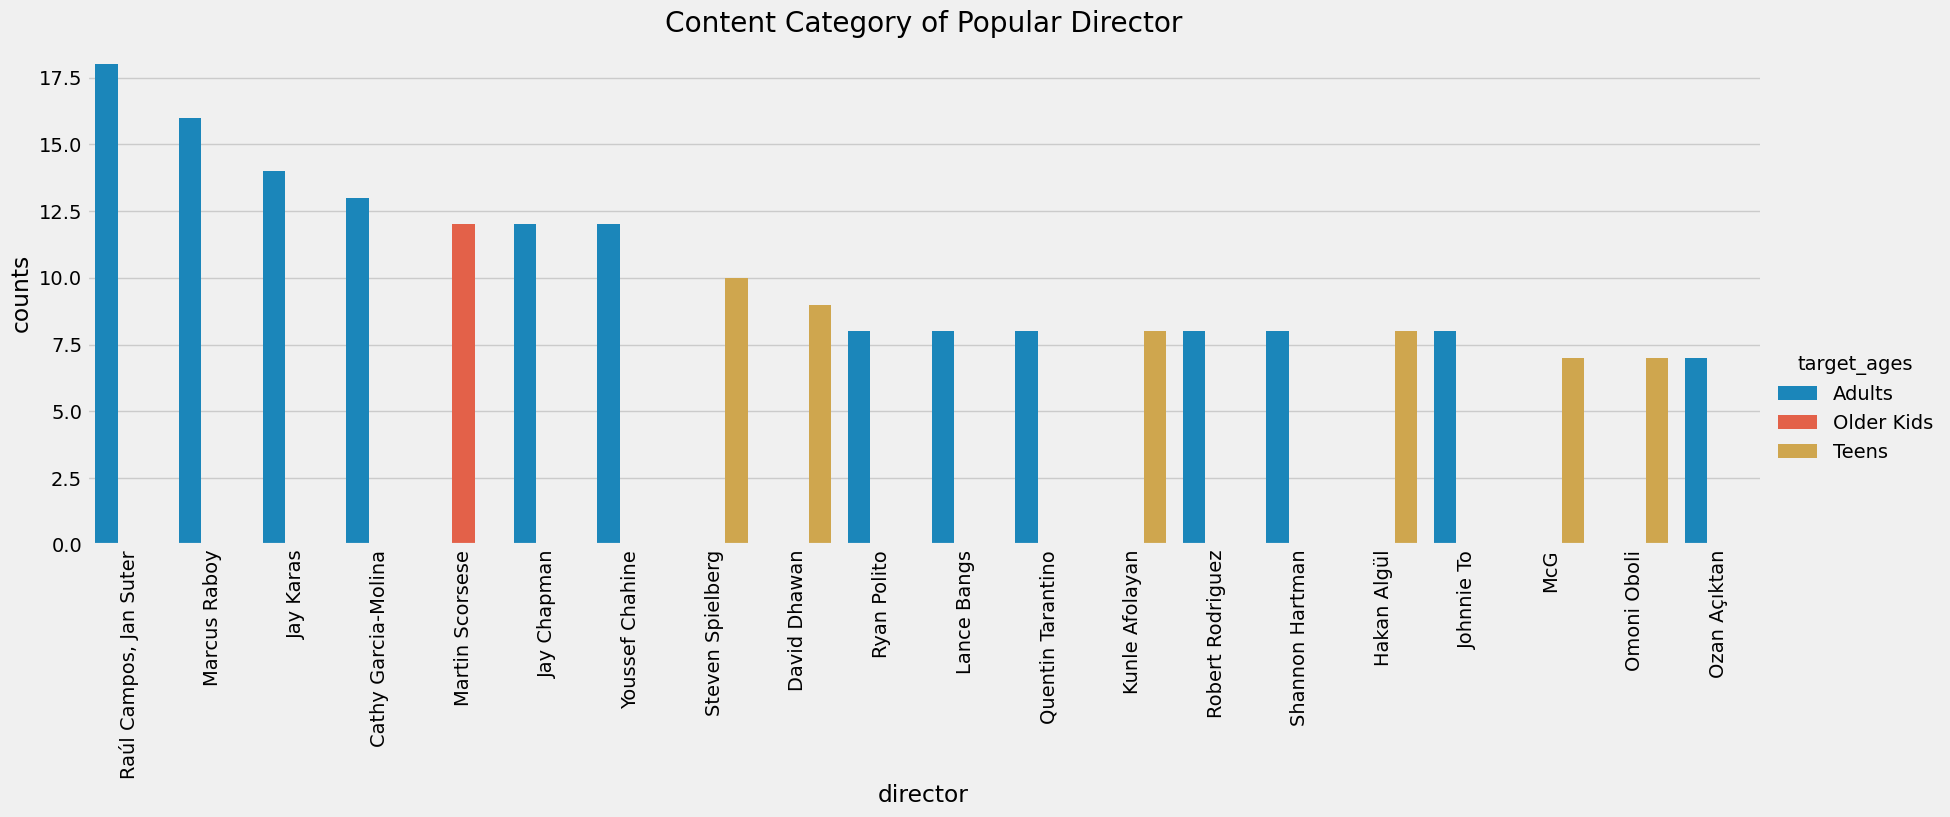

In [61]:
# Calling the function "create_plot"
create_plot('target_ages',title = 'Content Category of Popular Director')

##### 2. What is/are the insight(s) found from the chart?

Top 3 directors of movies i.e., "Raul Campos, Jan Suter", "Marcus Raboy", and "Jay Karas", create content that is mostly suitable for adult audiences. One  Popular indian director "David Dhawan" made content that are suitable for teens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained regarding the directors and the suitability of their content for different age groups can help create a positive business impact for Netflix. By understanding which directors create content that is most popular among different age groups, Netflix can create targeted marketing campaigns and recommendations for different customer segments, which can increase engagement and ultimately lead to more subscriptions and revenue.

#### Chart - 14 

**TOP 20 DIRECTOR & THEIR FAVOURITE GENRES**

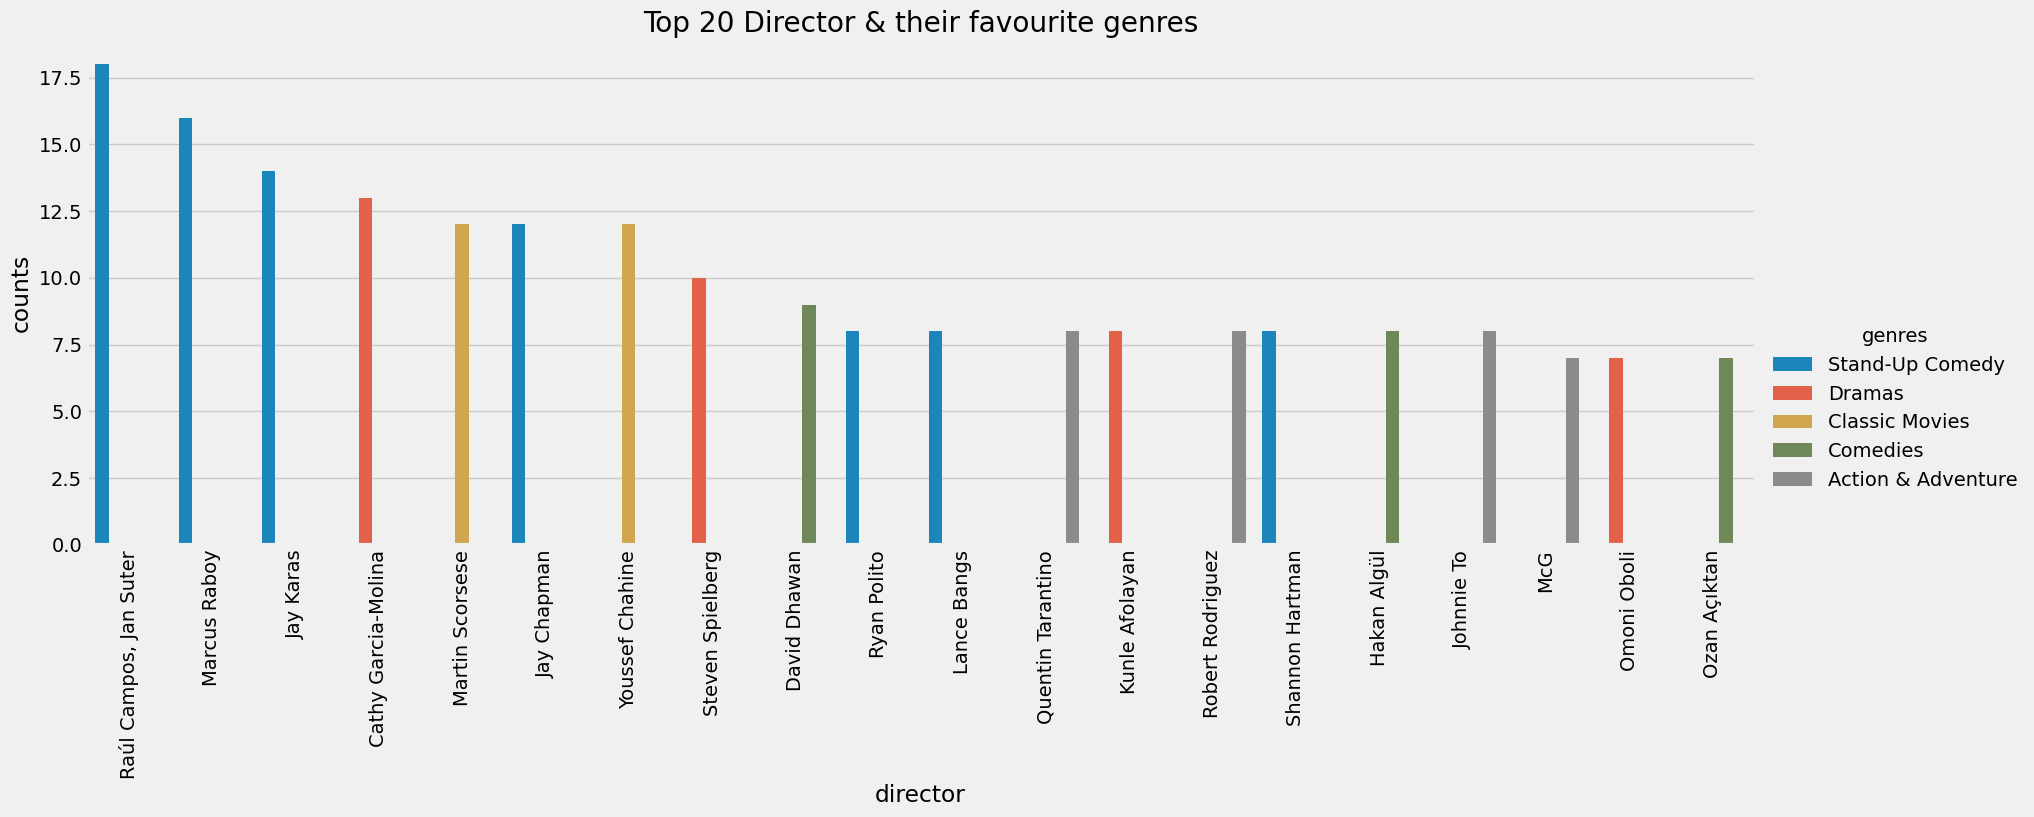

In [62]:
# Calling the function "create_plot" 
create_plot('genres',title = 'Top 20 Director & their favourite genres')

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis, the top 3 movie directors, Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas, create content that is mostly related to stand-up comedy.Indian Director "David Dhawan" mostly create Comedies.

#### Chart - 15

AVERAGE MOVIE LENGTH OVER THE YEARS

In [63]:
# Computing the average movie length for each year for movies only
movie_lengths_by_year = df[df['type'] == 'Movie'].groupby('release_year')['duration'].mean().reset_index()

# Creating a line plot using Plotly
fig = px.line(movie_lengths_by_year, x='release_year', y='duration')

# Updating the layout with a title, x-axis and y-axis labels, and a specific width and height
fig.update_layout(title='Average movie length over the years', xaxis_title='Year', yaxis_title='Length of movie in minutes', width=1000, height=500)

fig.show()



##### 1. Why did you pick the specific chart?

I have used line chart because line chart is useful in showing overall treand.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the line chart indicates that the average length of movies has seen an upward trend till around the year 1965, after which there has been a decline. This insight can help streaming platforms like Netflix in making informed decisions related to the content they acquire and produce. For example, they can prioritize the acquisition of movies that are of shorter duration and avoid investing in longer movies that may not be preferred by audiences.

###Chart - 16

In [64]:
from collections import defaultdict

def plot_top_crew(show_type, region, cast_crew, title, xaxis_title, yaxis_title):
    # Filtering the DataFrame to include only movies of the specified show_type and region
    temp_df = clean_df[(clean_df['type'] == show_type) & (clean_df['country'] == region)]
    
    # Creating a defaultdict object to store the director names and their frequencies
    categories = defaultdict(int)

    # Iterating over each row in the filtered DataFrame
    for index, row in temp_df.iterrows():
        # Checking if the row has a non-empty cast_crew field
        if row[cast_crew]:
            # Split the comma-separated director names into a list and iterate over each name
            for director in row[cast_crew].split(','):
                # Adding 1 to the frequency count for the director name in the 'categories' defaultdict
                categories[director.strip()] += 1

    # Sorting the 'categories' defaultdict by frequency in descending order and select the top 10 items
    counter_list = sorted(categories.items(), key=lambda x: x[1], reverse=True)[:10]

    # Creating two lists of director names and their frequencies from the 'counter_list' tuples, and reverse their order
    labels = [item[0] for item in counter_list][::-1]
    values = [item[1] for item in counter_list][::-1]

    # Ploting the bar chart using Plotly
    fig = go.Figure(go.Bar(x=values, y=labels, orientation='h'))
    fig.update_layout(title=title, xaxis_title=xaxis_title, yaxis_title=yaxis_title)
    fig.show()



**TOP 10 MOVIE DIRECTORS IN INDIA**

In [65]:
plot_top_crew('Movie','India','director','Top 10 Movie Director in India','Number of Movies','Director Name')

##### 2. What is/are the insight(s) found from the chart?

David Dhawan is most popular director in india follwed by Anurag Kashyap.

###Chart - 17

**TOP 10 MOVIE DIRECTORS IN UNITED STATES**

In [66]:
plot_top_crew('Movie','United States','director','Top 10 Movie Director in United States','Number of Movies','Director Name')

##### 2. What is/are the insight(s) found from the chart?

Jay karas and Marcus Raboy are two most popular director in USA 

###Chart - 18

**TOP 10 MOVIE ACTOR IN INDIA**

In [67]:
plot_top_crew('Movie','India','cast','Top 10 Movie Actor in India','Number of Movies','Actor Name')

##### 2. What is/are the insight(s) found from the chart?

Anupam Kher is top actor in india.

###Chart - 19

**TOP 10 MOVIE DIRECTORS IN UNITED STATES**

In [68]:
plot_top_crew('Movie','United States','cast','Top 10 Movie Actor in United States','Number of Movies','Actor Name')

##### 2. What is/are the insight(s) found from the chart?

Adam Sandler and Samuel L.Jackson are two most popular actor in USA.

###Chart - 20

**TOP 10 TV SHOWS DIRECTORS IN INDIA**

In [69]:
plot_top_crew('TV Show','India','director','Top 10 TV Shows Director in India','Number of TV Shows','Director Name')

##### 2. What is/are the insight(s) found from the chart?

Nizar Shafi,Patrick Graham,Soumendra Padhi,Sudha Kongara and Vignesh Shivam are among top TV Shows director in india.

###Chart - 21

**TOP 10 TV SHOWS ACTORS IN INDIA**

In [70]:
plot_top_crew('TV Show','India','cast','Top 10 TV Shows Actor in India','Number of TV Shows','Actor Name')

##### 2. What is/are the insight(s) found from the chart?

Radhika Apte,Manav Kaul,Rahman,Havish are among top TV Shows actor in india.

###Chart - 22

**TOP 10 TV SHOWS DIRECTORS IN UNITED STATES**

In [71]:
plot_top_crew('TV Show','United States','director','Top 10 TV Shows Director in United States','Number of TV Shows','Director Name')

##### 2. What is/are the insight(s) found from the chart?

Stan Lathan and Rob Seidenglanz are two top TV Shows director in USA.

###Chart - 23

**TOP 10 TV SHOWS ACTORS IN UNITED STATES**

In [72]:
plot_top_crew('TV Show','United States','cast','Top 10 TV Shows Actor in United States','Number of TV Shows','Actor Name')

##### 2. What is/are the insight(s) found from the chart?

Dave Chappelle and Keiynan Lonsdale are two top TV Shows actor in USA. 

###Chart - 24 Correlation Heatmap

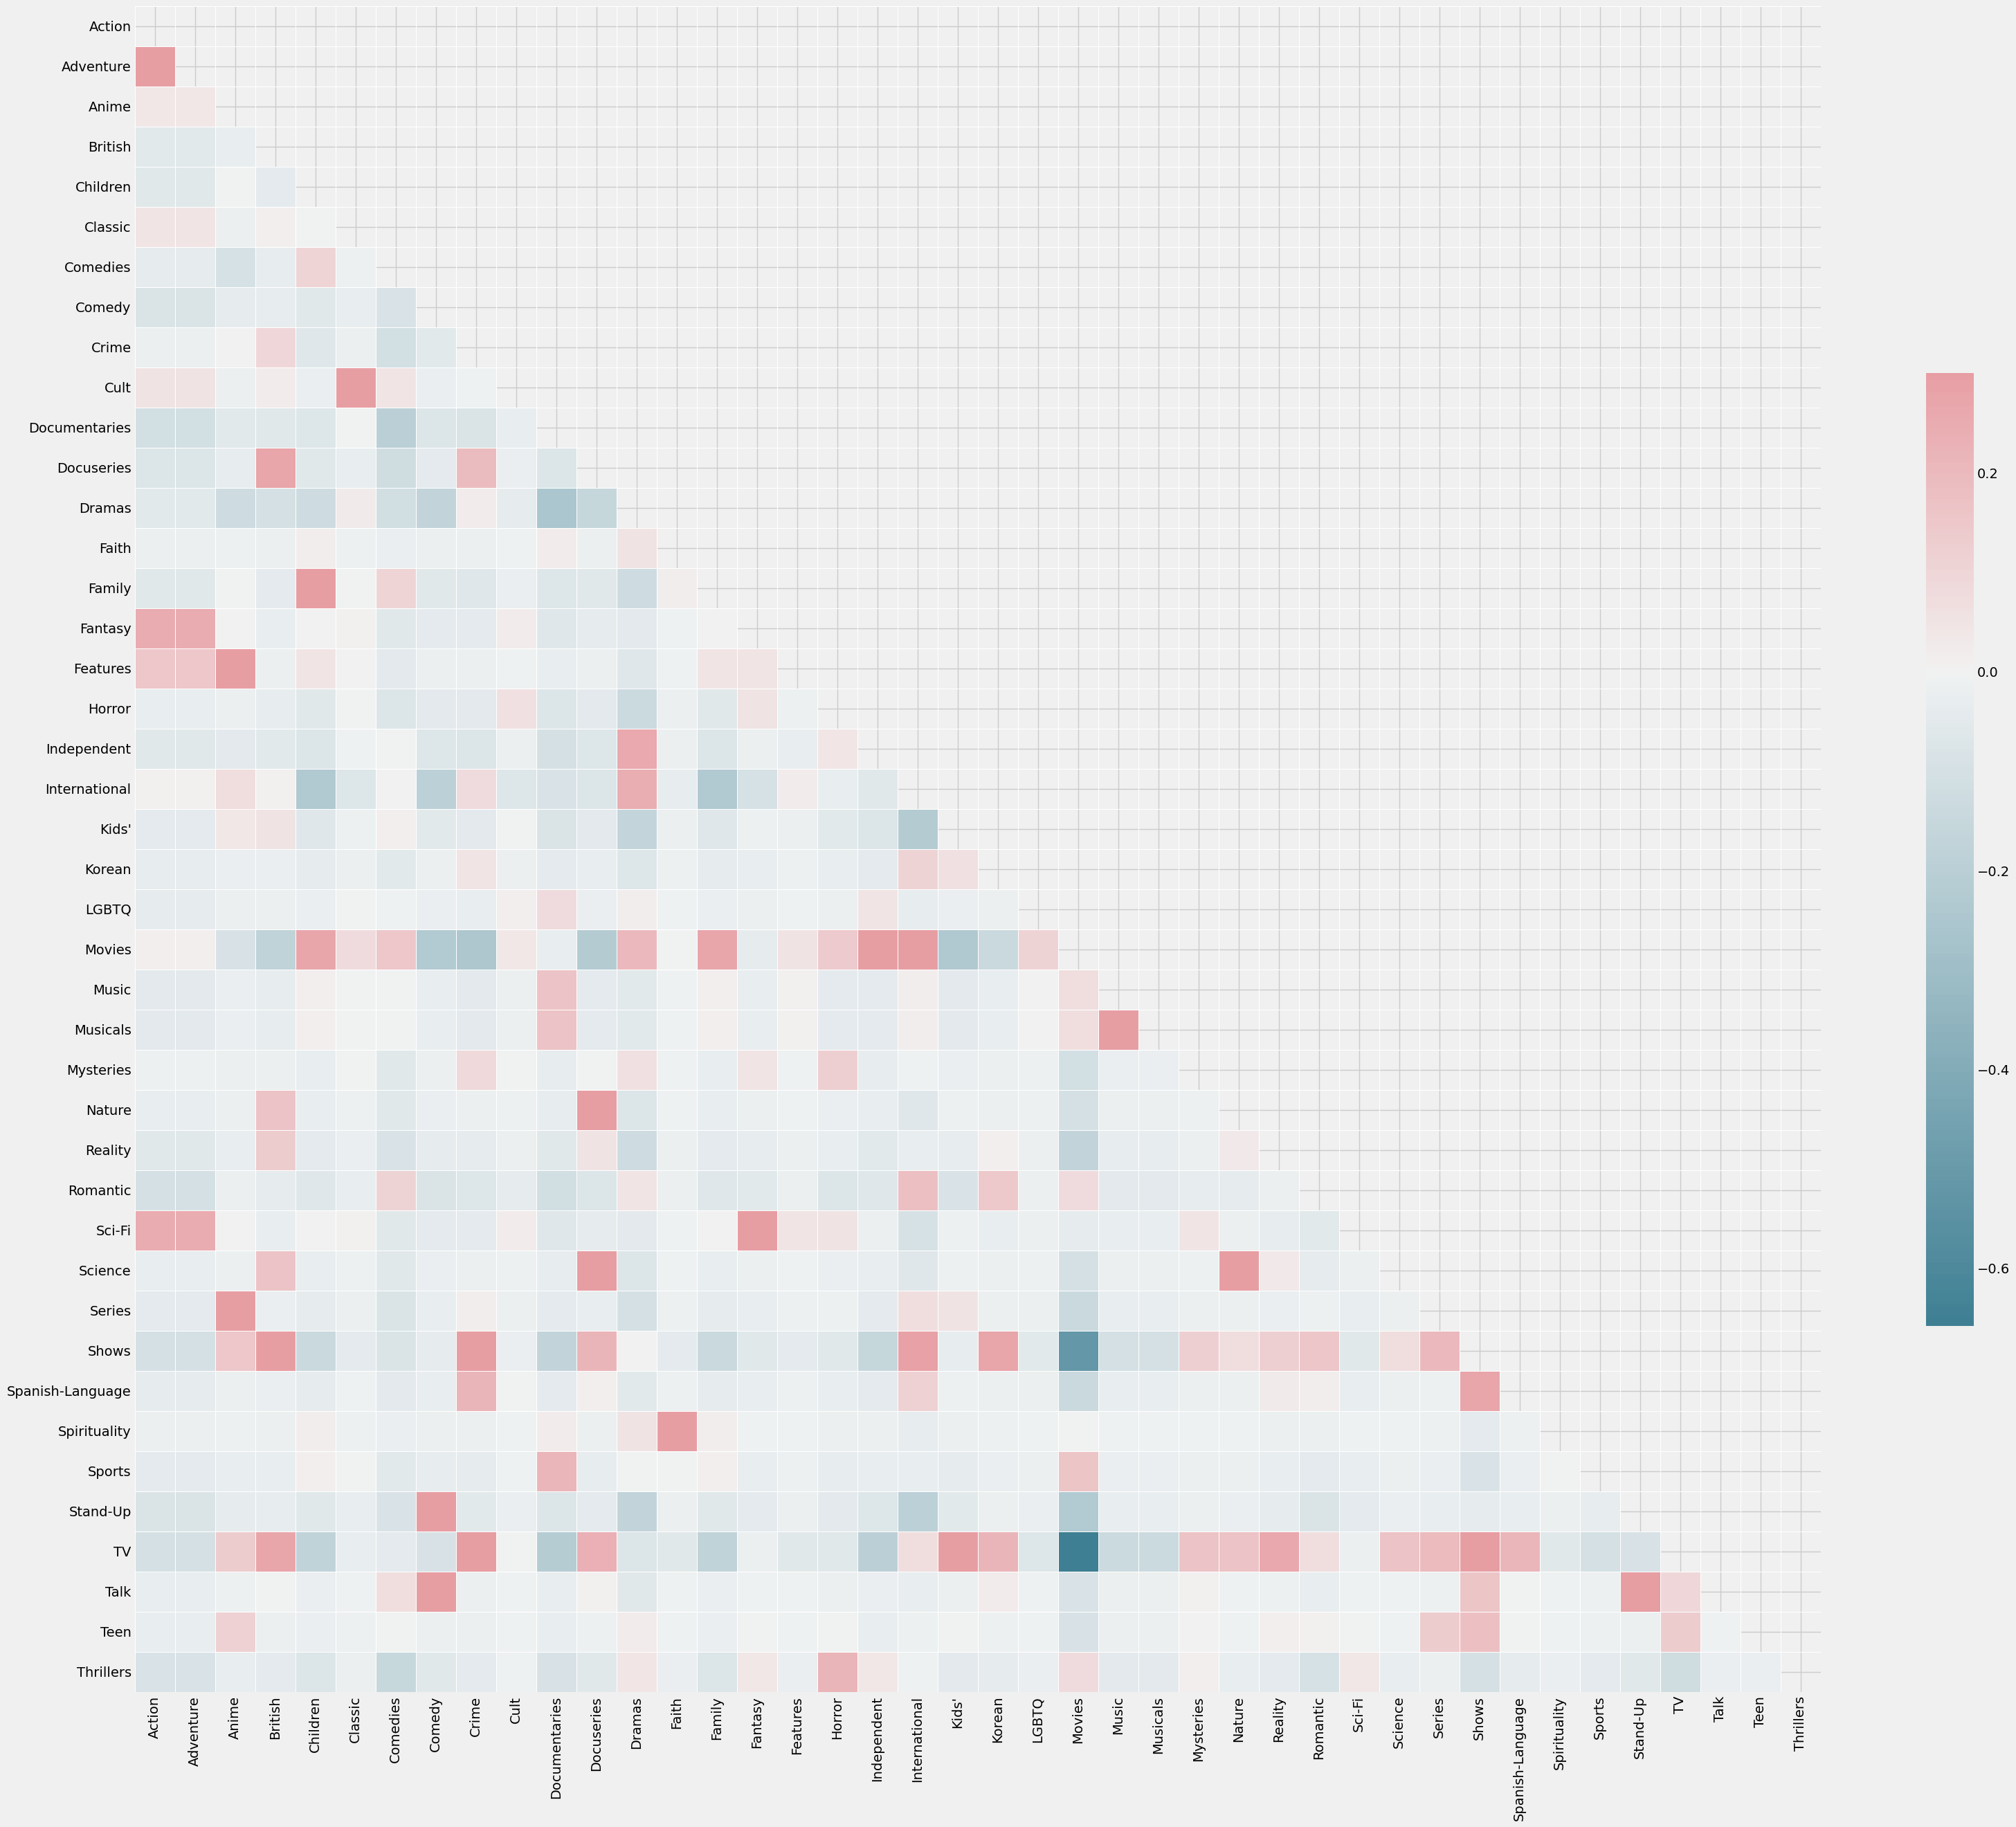

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extracting the 'listed_in' column as a Series object, replace '&' and ',' with spaces, and split the string into a list
data = df['listed_in'].astype(str).apply(lambda s: s.replace('&', ' ').replace(',', ' ').split()) 

# Using MultiLabelBinarizer to perform one-hot encoding on the list of genres
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(data), columns=mlb.classes_)

# Calculating the correlation matrix of the encoded genres
corr = res.corr()

# Creating a boolean mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the figure and color map
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plotting the heatmap with masked upper triangle 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


###Chart - 25

**WORLDCLOUD ON GENRES**

In [74]:
from wordcloud import WordCloud

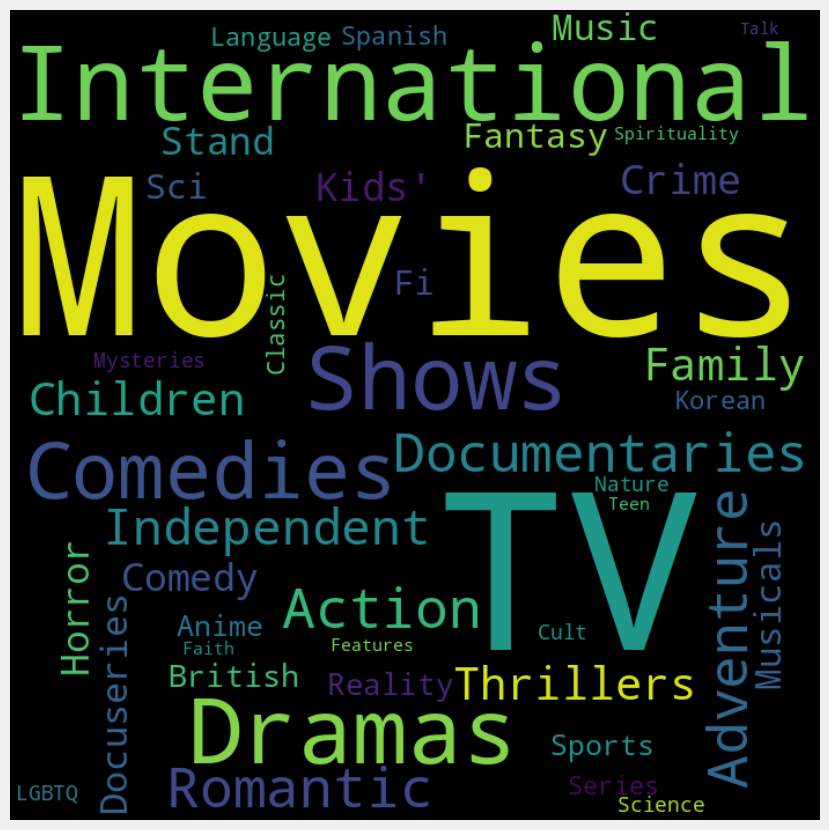

In [75]:
# creating the text variable
text = " ".join(items for items in df.listed_in)
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False,width = 700, height = 700).generate(text)
# Display the generated Word Cloud
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

###Chart - 26

**WORDCLOUDS ON DIRECTORS**

In [76]:
def create_worldcloud(feature):
  # creating the text variable
  text = " ".join(items for items in df[df[feature] != 'Unknown'][feature])
  # Creating word_cloud with text as argument in .generate() method
  word_cloud1 = WordCloud(collocations = False,width = 700, height = 700).generate(text)
  # Display the generated Word Cloud
  plt.figure(figsize = (10,10), facecolor = None)
  plt.imshow(word_cloud1, interpolation='bilinear')
  plt.axis("off")
  plt.show()

###Chart - 27

**WORDCLOUD ON DIRECTOR**

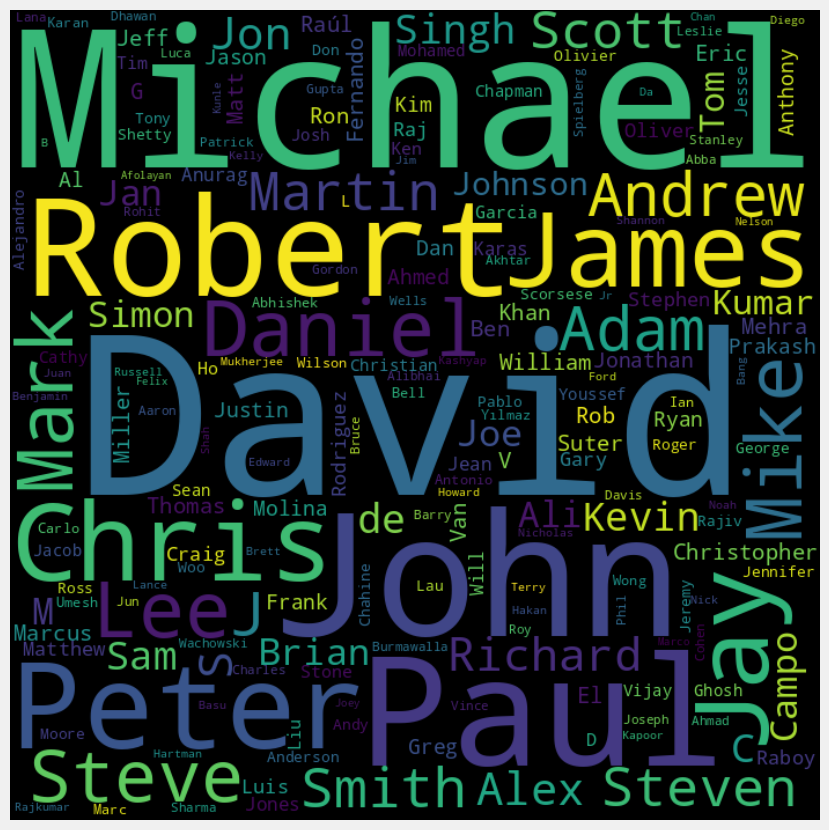

In [77]:
create_worldcloud('director')

###Chart - 28

**WORDCLOUDS ON CAST**

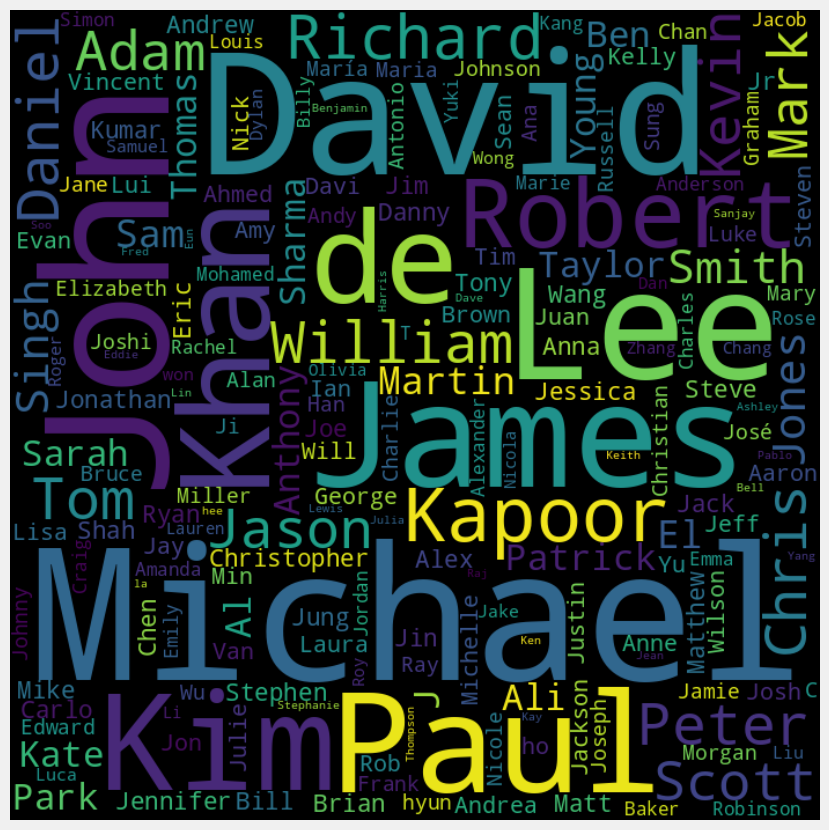

In [78]:
create_worldcloud('cast')

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [79]:
# Handling Missing Values & Missing Value Imput
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
genres          0
target_ages     0
dtype: int64

Missing Value already handled

### 2. Handling Outliers

In [80]:
# Handling Outliers & Outlier treatments
df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
month_added     object
year_added      object
genres          object
target_ages     object
dtype: object

##### What all outlier treatment techniques have you used and why did you use those techniques?

Only two numerical column found and for this project no outlier treatment required.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [81]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [85]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone projects/Capstone Project_4_Unsupervised_ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [86]:
data = pd.read_csv(path)

In [87]:
data.fillna('',inplace = True)

In [88]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [89]:
# Combining all the clustering attributes into a single column
data['clustering_attributes'] = (data['director'] + ' ' + data['cast'] +' ' + data['country'] +' ' + data['listed_in'] + ' ' + data['description'])

In [90]:
data['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

In [91]:
len(data['clustering_attributes'][40])

343

In [92]:
data['clustering_attributes'].dtypes

dtype('O')

##Removing non-ASCII characters

In [93]:
import re

def remove_non_ascii(text):
    """
    Function to remove non-ASCII characters from a string.

    Args:
        text: A string containing text that may include non-ASCII characters.

    Returns:
        A new string where any non-ASCII characters have been removed.

    """
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Applying the remove_non_ascii function to the clustering_attributes column of the data DataFrame
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_non_ascii)



#### 1. Expand Contraction

In [94]:
pip install contractions --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 13.0 MB/s eta 0:00:00


In [95]:
import contractions

# Applying the contractions.fix() function to the clustering_attributes column of the data DataFrame
# This function replaces common contractions (e.g., "can't" => "cannot") with their expanded forms.

data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x : contractions.fix(x))




#### 2. Lower Casing

In [96]:
# Lower Casing
data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x : x.lower())


#### 3. Removing Punctuations

In [97]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation using string.punctuation'''
    translator = str.maketrans('', '', string.punctuation)   
    # return the text stripped of punctuation marks
    return text.translate(translator)



In [98]:
# applying the remove_punctuation function to the clustering_attributes column
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [99]:
# Remove URLs & Remove words and digits contain digits
def remove_digits_urls(text):
    '''a function for removing digits and URLs from text'''
    # remove digits
    text = re.sub(r'\d+', '', text)
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # return text without digits and URLs
    return text



In [100]:
# applying the remove_digits_urls function to the clustering_attributes column
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_digits_urls)

#### 5. Removing Stopwords & Removing White spaces

In [101]:
# Remove Stopwords
# Defining the stop words to remove
stop_words = set(stopwords.words('english'))

# Defining a function to remove stop words from a given text
def remove_stopwords(text):
  # Splitting the text into individual words
    words = text.split()
    # Filtering out the stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Joining the filtered words back into a single string
    return ' '.join(filtered_words)

# Applying the remove_stopwords function to a column of text data
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_stopwords)


In [102]:
# Remove White spaces
#def remove_whitespace(text):
#    """Remove all white space from a text"""
#    return text.replace(" ", "")


In [103]:
#applying the remove_whitespace function to the clustering_attributes column
#data['clustering_attributes'] = data['clustering_attributes'].apply(remove_whitespace)


#### 7. Tokenization

In [104]:
data['clustering_attributes'][40]

'muharrem glmez erdem yener ayhan ta emin olcay muharrem glmez elif nur kerkk tark papuuolu suzan aksoy doa konakolu esin eden deniz zerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [105]:
# Tokenization
# Create an instance of the TweetTokenizer class
tokenizer = TweetTokenizer()
#Applying Tolenization
data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### 8. Text Normalization

In [106]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
# Defining a function to lemmatize each token
def lemmatize_tokens(tokens):
    lem = WordNetLemmatizer()
    return [lem.lemmatize(token) for token in tokens]

#Applying Lemmitization
data['clustering_attributes'] = data['clustering_attributes'].apply(lemmatize_tokens)   


##### Which text normalization technique have you used and why?

I have used lemmatization as the text normalization technique because it reduces words to their base form, which can help with text analysis and understanding. It also helps to avoid duplication of words with different inflections, and makes it easier to perform analysis on the text. Additionally, lemmatization is more accurate than stemming as it uses a dictionary-based approach to identify the correct base form of a word.

In [107]:
# Extracting the column of text data to be used for clustering
clustering_data = data['clustering_attributes']

In [108]:
data['clustering_attributes']

0       [joo, miguel, bianca, comparato, michel, gomes...
1       [jorge, michel, grau, demin, bichir, hctor, bo...
2       [gilbert, chan, tedd, chan, stella, chung, hen...
3       [shane, acker, elijah, wood, john, c, reilly, ...
4       [robert, luketic, jim, sturgess, kevin, spacey...
                              ...                        
7782    [josef, fare, imad, creidi, antoinette, turk, ...
7783    [mozez, singh, vicky, kaushal, sarahjane, dia,...
7784    [nasty, c, documentary, international, movie, ...
7785    [adriano, zumbo, rachel, khoo, australia, inte...
7786    [sam, dunn, united, kingdom, canada, united, s...
Name: clustering_attributes, Length: 7787, dtype: object

In [109]:
type(clustering_data)

pandas.core.series.Series

In [110]:
# Converting the Pandas Series to a list of strings
doc_list = clustering_data.tolist()

#### 10. Text Vectorization

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert each list of strings in the Pandas Series to a single string
documents = [' '.join(strings) for strings in clustering_data]

# Create a TfidfVectorizer object with desired parameters
tfidf = TfidfVectorizer(stop_words='english', lowercase=False,max_features = 20000)

# Use fit_transform() method to transform the list of strings to a TF-IDF feature matrix
X = tfidf.fit_transform(documents)

# Print the vocabulary and TF-IDF vectors for each document
print("Vocabulary: ", tfidf.vocabulary_)
print(X.toarray())


Vocabulary:  {'joo': 8826, 'miguel': 11719, 'bianca': 1821, 'comparato': 3643, 'michel': 11693, 'gomes': 6756, 'rodolfo': 15155, 'oliveira': 12965, 'rafael': 14291, 'lozano': 10602, 'porto': 13912, 'mel': 11580, 'sergio': 16151, 'zez': 19940, 'celso': 2943, 'brazil': 2257, 'international': 8189, 'tv': 18462, 'drama': 5156, 'scifi': 15934, 'fantasy': 5985, 'future': 6410, 'elite': 5525, 'inhabit': 8108, 'island': 8318, 'paradise': 13269, 'far': 5986, 'crowded': 4068, 'slum': 16669, 'chance': 3034, 'join': 8790, 'saved': 15815, 'jorge': 8841, 'demin': 4553, 'bichir': 1830, 'hctor': 7215, 'bonilla': 2084, 'oscar': 13105, 'serrano': 16162, 'ortiz': 13099, 'carmen': 2791, 'beato': 1624, 'mexico': 11674, 'movie': 12048, 'devastating': 4693, 'earthquake': 5355, 'hit': 7509, 'city': 3396, 'trapped': 18265, 'survivor': 17280, 'walk': 19175, 'life': 10290, 'wait': 19164, 'rescued': 14829, 'trying': 18387, 'desperately': 4653, 'stay': 17002, 'alive': 574, 'gilbert': 6620, 'chan': 3032, 'stella': 

In [112]:
type(X)

scipy.sparse._csr.csr_matrix

In [113]:
X = X.toarray()

In [114]:
type(X)

numpy.ndarray

In [115]:
X.shape

(7787, 20000)

##### Which text vectorization technique have you used and why?

I have used because it is a statistical measure used to evaluate the importance of a word in a document or corpus. The TF-IDF score for a word is proportional to the frequency of the word in the document, but inversely proportional to the frequency of the word in the corpus.It not only captures the frequency of each word in the document but also takes into account the rarity of the word across the corpus.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes dimensionality reduction is needed because it reduces computational complexity and improve the performance of machine learning algorithms also as the number of features or dimensions increases, the amount of data required to adequately represent the data also increases. This can lead to overfitting, a phenomenon known as the curse of dimensionality

In [116]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

In [117]:
# Perform PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

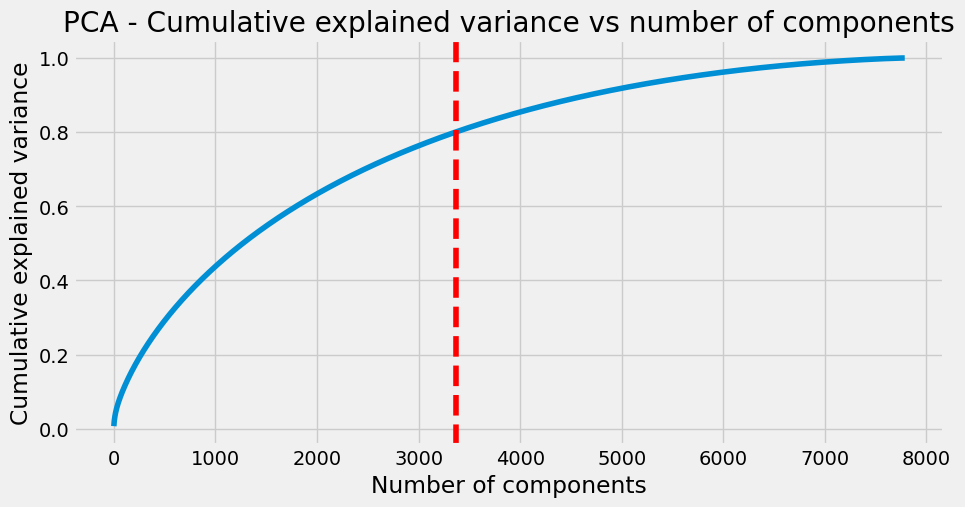


Number of components that explain 80% of the variance:  3364


In [118]:
# Explained variance for different number of components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.8) + 1

# Plotting the cumulative explained variance vs number of components and marking component that shows around 90% Variance
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance)
plt.axvline(x=n_components, color='r', linestyle='--')
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
print("")
print("Number of components that explain 80% of the variance: ", n_components)


* 80% Variance explained by around 3364 components so to reducing dimensionality taking 3500 components into consideration.

In [119]:
# Initializing PCA with 3500 principal components
pca = PCA(n_components=3500, random_state=42)
# Fitting and transform the high-dimensional text data X into a lower-dimensional space using PCA
X_pca = pca.fit_transform(X)

In [120]:
X_pca.shape

(7787, 3500)

## ***7. ML Model Implementation***

### ML Model - 1

**K MEANS CLUSTERING**

In [121]:
# Importing necessary libraries
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, AffinityPropagation, estimate_bandwidth, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

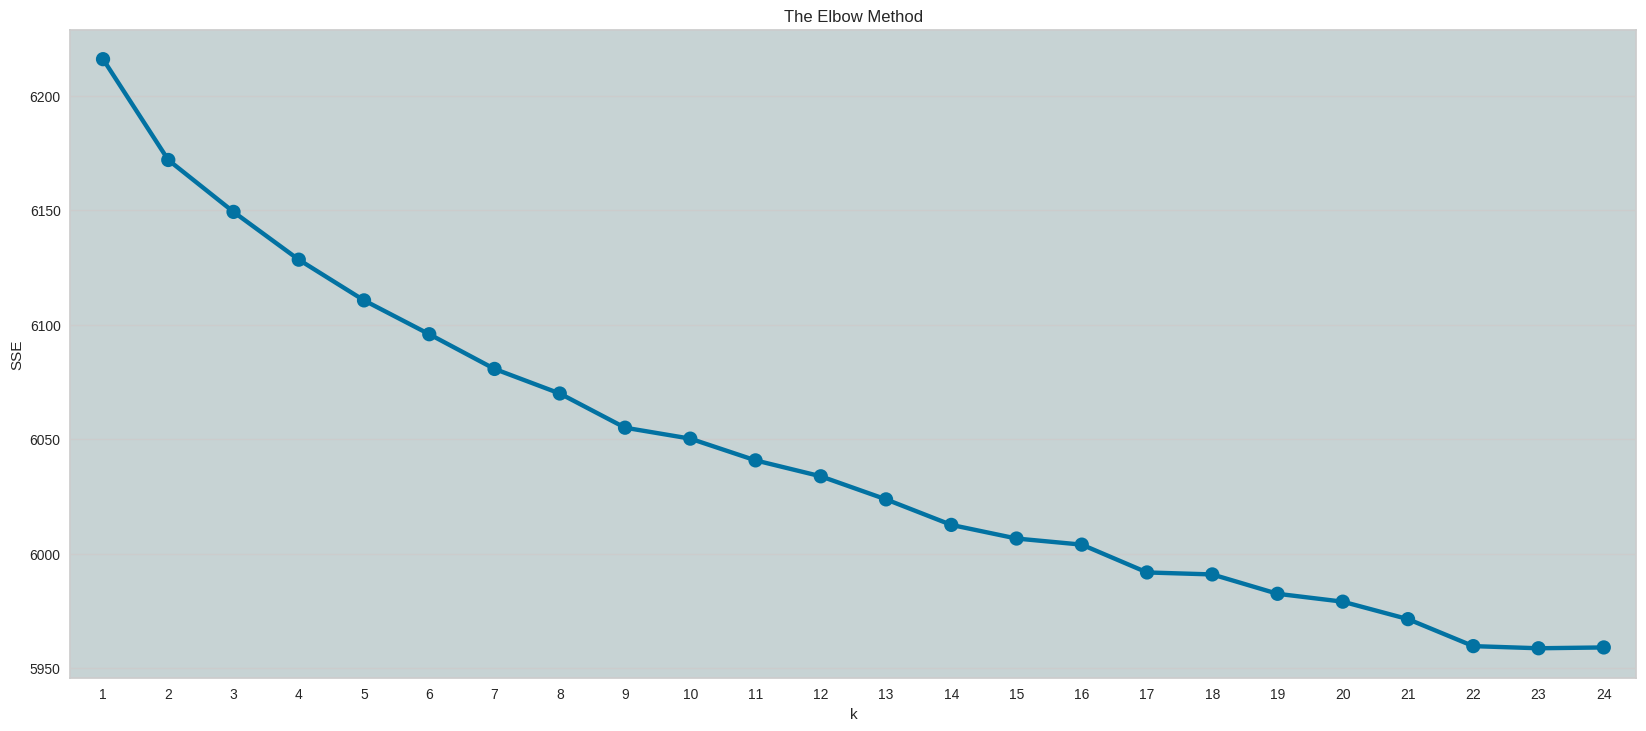

In [122]:
# Initializing an empty dictionary to store the sum of squared errors (SSE) for each k
sse = {}

# Rinning a loop for k in the range of 1 to 24
for k in range(1, 25):
  
    # Initializing a KMeans object with k clusters and fit it to the transformed data
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_pca)
    # Storing the SSE for this value of k in the dictionary
    sse[k] = kmeans.inertia_
    
    
fig, ax = plt.subplots(figsize = (18, 8))

ax.set_facecolor("#C7D3D4")
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
# Using Seaborn to create a pointplot of SSE vs. k
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))

plt.show()

In [123]:
# Initializing an empty dictionary to store the silhouette coefficients for each k
silhouette_coefficients = {}

# Looping over values of k from 2 to 24
for k in range(2, 25):
    
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_pca)
    # Calculate the silhouette coefficient for this value of k and store it in the dictionary
    silhouette_coefficients[k] = silhouette_score(X, kmeans.labels_)

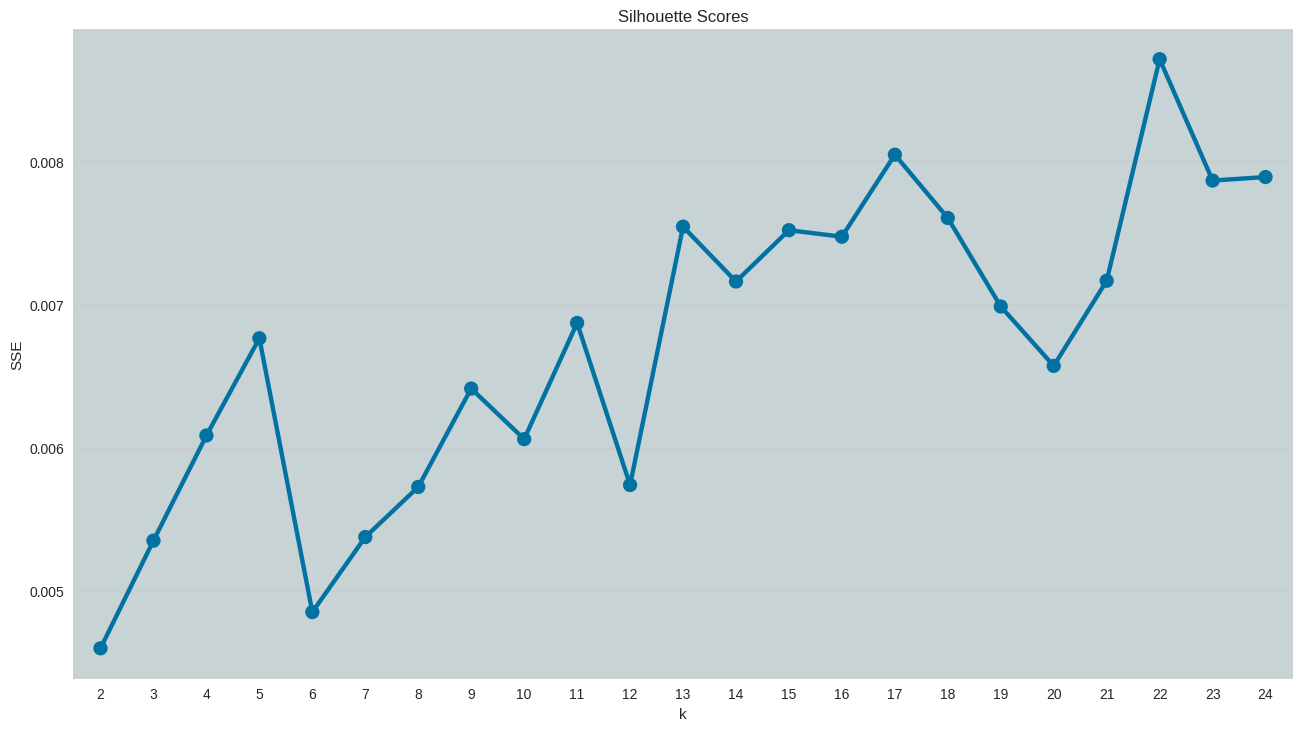

In [124]:
fig, ax = plt.subplots(figsize = (14,8))

ax.set_facecolor("#C7D3D4")
# Plotting the pointplot
sns.pointplot(x = list(silhouette_coefficients.keys()), y = list(silhouette_coefficients.values()))

plt.title("Silhouette Scores")
plt.xlabel("k"); plt.ylabel("SSE")

plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Defining a color palette to use for the clusters
palette = sns.color_palette("bright", 30)

# Creating a figure with a grid of subplots
fig, axes = plt.subplots(8, 3, figsize=(18, 20))

# Running a loop 
for i in range(2, 26):
   # Calculating the row and column indices for the current subplot
    row = (i - 2) // 3
    col = (i - 2) % 3

# Initializing a KMeans object with k clusters, fit it to the transformed data, and get the cluster labels
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X_pca)
    cluster = km.labels_

# Setting the title of the subplot to the number of clusters and the silhouette score for the current k
    visualizer = SilhouetteVisualizer(km, colors=palette[:len(set(cluster))], ax=axes[row, col])
    visualizer.fit(X_pca)
    
# Setting the x and y axis labels for the current subplot
    axes[row, col].set_title(str(i) + ' Clusters\nSilhouette score: ' + str(round(silhouette_score(X_pca, cluster), 3)))
    axes[row, col].set_xlabel('Silhouette coefficient values')
    axes[row, col].set_ylabel('Cluster label')

plt.tight_layout()
plt.show()


* *The highest Silhouette score was found for 22 Clusters*

In [ ]:
# Clustering data on the 22 Clusters
from sklearn.cluster import KMeans
# Creating an instance of the KMeans algorithm with 22 clusters and a random state of 18
model_tf = KMeans(n_clusters = 22,random_state=18)
# Fitting the KMeans model
model_tf.fit(X_pca)

In [ ]:
# Retrieving the labels assigned to each data point by the KMeans model
labels_tf = model_tf.labels_
# Retrieving the cluster centers of the KMeans model
cluster_center_tf=model_tf.cluster_centers_

In [ ]:
labels_tf

In [ ]:
cluster_center_tf

In [ ]:
from sklearn import metrics
# Computing the silhouette score of the KMeans model
silhouette_score_tf = metrics.silhouette_score(X_pca, labels_tf, metric='euclidean')

In [ ]:
silhouette_score_tf

In [ ]:
# Creating a copy of the original data and adding a new column with the cluster labels assigned by the KMeans model
df1 = data.copy()
df1['kmeans_clus_labels'] = model_tf.labels_

In [ ]:
df1.head()

In [ ]:
# Finding the number of data points in each cluster
df1.groupby(['kmeans_clus_labels'])['clustering_attributes'].count()

In [ ]:
# create a DataFrame with the cluster labels and counts
cluster_counts = df1.groupby(['kmeans_clus_labels'])['clustering_attributes'].count()
cluster_df = pd.DataFrame({'Cluster number': cluster_counts.index, 'Number of points': cluster_counts.values})

# create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=cluster_df['Cluster number'], y=cluster_df['Number of points'], marker={'color': 'rgb(158,202,225)', 'line': {'color': 'rgb(8,48,107)', 'width': 1}}, opacity=0.6)])
fig.update_layout(title='KMeans cluster points', xaxis_title='Cluster number', yaxis_title='Number of points', plot_bgcolor='white', font=dict(size=12, color='black'), margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()



In [ ]:
def visualize_wordcloud(cluster_label,cluster_number, text_col='clustering_attributes',figsize=(10,10)):
    """
    Generates a word cloud for a specific cluster label in a DataFrame.

    Args:
        cluster_label: str, label of the cluster to visualize
        cluster_number: int, number of the cluster to visualize
        text_col: name of the column containing the list of items to generate the word cloud
        figsize: size of the figure
    
    """
      
    # filter the DataFrame to only include the specified cluster label
    cluster_df = df1[df1[cluster_label] == cluster_number]

    # concatenate all the items from the list in the documents in the cluster
    text = ' '.join([item for item_list in cluster_df[text_col].values for item in item_list])

    # generate the word cloud
    wordcloud = WordCloud(background_color='black',max_words=50).generate(text)

    # plot the word cloud
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster_label}")
    plt.show()


**CREATING WORLDCLOUDS**

In [ ]:
visualize_wordcloud(cluster_label = 'kmeans_clus_labels',cluster_number = 1)

In [ ]:
visualize_wordcloud(cluster_label = 'kmeans_clus_labels',cluster_number = 2)

In [ ]:
visualize_wordcloud(cluster_label = 'kmeans_clus_labels',cluster_number = 3)

### ML Model - 2

**AGGLOMERATIVE CLUSTERING**

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# calculate the linkage matrix
Z = linkage(X_pca, method='ward')

# plot the dendrogram
plt.figure(figsize=(18, 8))
dendrogram(Z, leaf_font_size=10)
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [ ]:
# calculate the linkage matrix
Z = linkage(X_pca, method='ward')

# plot the dendrogram
plt.figure(figsize=(18, 8))
dendrogram(Z, leaf_font_size=10)
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.axhline(y= 3.9, color='r', linestyle='--')
plt.show()

**I am taking threshold at a distance of 3.9 and taking 12 clusters according to this threshold**

In [ ]:
# Applying agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster_labels'] = cluster.labels_

In [ ]:
df1.head()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# create a DataFrame with the cluster labels and counts
cluster_counts = df1.groupby(['hierarchical_cluster_labels'])['clustering_attributes'].count()
cluster_df = pd.DataFrame({'Cluster number': cluster_counts.index, 'Number of points': cluster_counts.values})

# create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=cluster_df['Cluster number'], y=cluster_df['Number of points'], marker={'color': 'rgb(158,202,225)', 'line': {'color': 'rgb(8,48,107)', 'width': 1}}, opacity=0.6)])
fig.update_layout(title='Hierarchical cluster points', xaxis_title='Cluster number', yaxis_title='Number of points', plot_bgcolor='white', font=dict(size=12, color='black'), margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()



**WORLDCLOUDS FOR DIFFERENT CLUSTERS** 

In [ ]:
visualize_wordcloud(cluster_label = 'hierarchical_cluster_labels',cluster_number = 1)

In [ ]:
visualize_wordcloud(cluster_label = 'hierarchical_cluster_labels',cluster_number = 2)

In [ ]:
visualize_wordcloud(cluster_label = 'hierarchical_cluster_labels',cluster_number = 3)

**MAKING A CONTENT BASED RECOMMENDER SYESTEM**

In [ ]:
# Fillling all missing values in recommender_df with empty string
recommender_df.fillna("",inplace = True)

In [ ]:
# Creating a list of feature in whuch we have to make recommendation
features=['title','director','cast','listed_in','description']

In [ ]:
# Creating a dataframe of all these features
recommender_df = recommender_df[features]

In [ ]:
# Writting a function that will remove apaces and convert them to lowercase
def clean_data(x):
    return ''.join([word for word in x.split() if word != '']).lower()


In [ ]:
# Applying clean data function
for elem in features:
  recommender_df[elem] = recommender_df[elem].apply(clean_data)

In [ ]:
# Creating a feature which is a combination of all the features that will be used to make recommendation
recommender_df['feature'] = recommender_df['title'] + " " + recommender_df['director'] + " " + recommender_df['cast'] + " " + recommender_df['listed_in']+ " " + recommender_df['description']


In [ ]:
# Importing the CountVectorizer and cosine_similarity functions from the scikit-learn library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Creatting a CountVectorizer object with the stop_words parameter set to 'english'
count = CountVectorizer(stop_words='english')

# Use the CountVectorizer object to transform the 'feature' column of the recommender_df dataframe into a matrix of token counts
count_matrix = count.fit_transform(recommender_df['feature'])

# Calculating the cosine similarity between all pairs of documents in the count_matrix, and store the results in the similarity matrix
cos_sim = cosine_similarity(count_matrix, count_matrix)


In [ ]:
count_matrix

In [ ]:
count_matrix.shape

In [ ]:
# Displaying cos_sim matrix
cos_sim

The cosine similarity between two movies is a measure of how similar their feature vectors are. It ranges from -1 to 1, where a value of 1 indicates that the movies have identical feature vectors, a value of -1 indicates that the movies have completely opposite feature vectors, and a value of 0 indicates that the movies have no shared features.The diagonal elements of the matrix represent the similarity between a movie and itself, which will always be 1.

In [ ]:
cos_sim.shape

In [ ]:
recommender_df.head(3)

In [ ]:
# Resetting the index of the recommender_df such that it will add an index column that will starts from 0
recommender_df = recommender_df.reset_index()

In [ ]:
# Creating a pandas Series object where the index is the 'title' column of the recommender_df dataframe,
# and the values are the corresponding row indices in the dataframe
indices = pd.Series(recommender_df.index, index=recommender_df['title'])

In [ ]:
indices

In [ ]:
from operator import itemgetter

In [ ]:
def get_recommendations(title):
    try:
        title=title.replace(' ','').lower()
        idx = indices[title]

        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores = [(i, j) for i, j in enumerate(cos_sim[idx])]

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=itemgetter(1), reverse=True)

        # Get the scores of the 10 most similar movies
        sim_scores = sim_scores[1:11]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        return df['title'].iloc[movie_indices]
    except KeyError:
        return "This movie is not available on Netflix"


In [ ]:
get_recommendations('Special 26')

In [ ]:
get_recommendations('Dangal')

In [ ]:
get_recommendations('Fast & Furious')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Around 69% content available on Netflix are Movie and 31% are TV Shows.
* Netflix Contains more Movies and Shows that have rating "TV-MA" followed by "TV-14".
* from 2010 to 2019 netflix has shown tremendous increase in number of shows i.e 1 show in 2010 to 2153 show in 2019.
* From 2001 to 2018, the number of shows released by Netflix increased every year. However, in 2019 and 2020, there was a slight decline, which is likely due to the impact of COVID-19. As we know, there were lockdowns across the globe during that time.
* The top three months in a calendar year during which the most number of shows are added to the platform are December, followed by October, and then January.
* Majority of content available on the popular streaming platform Netflix is produced in the United States, followed by content produced in India and the United Kingdom.
* Majority of content available on Netflix is suitable for adult audiences, followed by teenagers, older kids, and kids.
* Drama is the most popular genre of content available on Netflix, followed by comedies and documentaries. Action and adventure are also popular genres, with many of the platform's most-watched shows and movies falling under this category.
* Grey's Anatomy has most number of seasons i.e 16 seasons in TV Shows category while Supernatural & NCIS have equal number of seasons i.e 15 seasons.
* The histogram of duration for movies is approximately symmetric or slightly skewed to the right. This means that the distribution of movie durations is relatively balanced, with a slight tendency towards longer movies.
* In overall category including content from all countries top three directors are Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas.
* Overall Alastair Fothergill is the top director of TV shows on Netflix.
* Top 3 directors of movies i.e., "Raul Campos, Jan Suter", "Marcus Raboy", and "Jay Karas" create content that is mostly suitable for adult audiences.One Popular indian director "David Dhawan" made content that are suitable for teens.
* Top 3 movie directors, Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas, create content that is mostly related to stand-up comedy.
* The average length of movies has seen an upward trend till around the year 1965, after which there has been a decline. This insight can help streaming platforms like Netflix in making informed decisions related to the content they acquire and produce.
* David Dhawan is most popular director in india follwed by Anurag Kashyap.
* Jay karas and Marcus Raboy are two most popular director in USA.
* Anupam Kher is top actor in india.
* Adam Sandler and Samuel L.Jackson are two most popular actor in USA.
* Nizar Shafi,Patrick Graham,Soumendra Padhi,Sudha Kongara and Vignesh Shivam are among top TV Shows director in india.
* Radhika Apte,Manav Kaul,Rahman,Havish are among top TV Shows actor in india.
* Stan Lathan and Rob Seidenglanz are two top TV Shows director in USA.
* Dave Chappelle and Keiynan Lonsdale are two top TV Shows actor in USA.
* Features that are used to make clusters are director,cast,country,genres and description.
* Text vectorization is done using term frequency-inverse document frequency (tf-idf) results in a sparse matrix of shape 7777 rows by 20000 columns, where each row corresponds to a document in the corpus and each column corresponds to a unique term in the vocabulary. 
* To reduce the dimensionality of the high-dimensional data represented by a sparse matrix of shape 7777 by 20000, principal component analysis (PCA) was applied while retaining 80% of the variance in the data. This resulted in a reduced feature space of 3500 dimensions, which captures the most important patterns and structures in the original data.
* For K means clustering after applying clustering techniques such as silhouette score and elbow method to the text data, it was determined that the optimal number of clusters for the data is 22. To visualize the clustering results, a bar chart was created to show the distribution of documents among the 22 clusters. Moreover, word clouds were generated for each cluster to highlight the most frequent terms that appear in the documents within each cluster.
* In agglomerative clustering, a distance threshold of 3.9 was chosen to form 12 clusters from the text data. Each cluster was visualized through a bar chart displaying the number of documents in each cluster and word clouds that represent the most common terms used in the documents within each cluster.
* Finally a content-based recommender system was built using cosine similarity. A function was created that takes a movie name as input and recommends similar movies based on their similarity scores with the input movie.The similarity scores were computed using cosine similarity between the vectorized representations of the movie plots.The recommended movies are those with the highest similarity scores to the input movie. 






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***